In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import scipy.stats as stats

## License of irish dataset:
https://creativecommons.org/licenses/by/4.0/

In [2]:
#getting json info of NaPTAN
naptan_irl_json = "https://www.transportforireland.ie/transitData/naptan.json"
response = requests.get(naptan_irl_json)

In [3]:
#check the response
response

<Response [200]>

In [4]:
# Parse the JSON response
data = response.json()
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'AtcoCode': '7010PB003857',
    'CommonName': 'Ballymagrorty',
    'CommonNameGA': 'B Mhic Robhartaigh',
    'ShortCommonName': 'Ballymagrorty',
    'ShortCommonNameGA': 'B Mhic Robhartaigh',
    'NptgLocalityRef': 'E0701003',
    'Easting': 641057,
    'Northing': 920841,
    'Latitude': 55.0334043,
    'Longitude': -7.3577718,
    'StopType': 'BCT',
    'BusStopType': 'CUS',
    'TimingStatus': 'OTH',
    'CompassPoint': 'NW',
    'AdministrativeAreaRef': 701,
    'Status': 'active',
    'CreationDateTime': '1969-12-31T00:00:00.000',
    'ModificationDateTime': '2021-06-01T16:08:18.000'},
   'geometry': {'type': 'Point', 'coordinates': [-7.3577718, 55.0334043]}},
  {'type': 'Feature',
   'properties': {'AtcoCode': '7010PB003858',
    'CommonName': 'Coshquin',
    'NptgLocalityRef': 'E0701003',
    'Easting': 641054,
    'Northing': 920860,
    'Latitude': 55.0335753,
    'Longitude': -7.3578159,
    'St

<h1>Data pre-processing of irish dataset 🇮🇪</h1>

In [5]:
from pandas import json_normalize

#Use json_normalize to flatten the nested structure
df_ireland = json_normalize(data['features'])

#Display the DataFrame
df_ireland.head(20)

,type,properties.AtcoCode,properties.CommonName,properties.CommonNameGA,properties.ShortCommonName,properties.ShortCommonNameGA,properties.NptgLocalityRef,properties.Easting,properties.Northing,properties.Latitude,...,properties.CompassPoint,properties.AdministrativeAreaRef,properties.Status,properties.CreationDateTime,properties.ModificationDateTime,geometry.type,geometry.coordinates,properties.Street,properties.PlateCode,properties.StopAreaRef
0,Feature,7010PB003857,Ballymagrorty,B Mhic Robhartaigh,Ballymagrorty,B Mhic Robhartaigh,E0701003,641057,920841,55.033404,...,NW,701,active,1969-12-31T00:00:00.000,2021-06-01T16:08:18.000,Point,"[-7.3577718, 55.0334043]",NaN,NaN,NaN
1,Feature,7010PB003858,Coshquin,NaN,NaN,NaN,E0701003,641054,920860,55.033575,...,N,701,active,1969-12-31T00:00:00.000,2016-10-28T15:12:27.000,Point,"[-7.3578159, 55.0335753]",NaN,NaN,NaN
2,Feature,7010PB003859,Culmore Point,NaN,NaN,NaN,E0701003,646370,922263,55.045712,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2744401, 55.0457123]",Culmore Road,NaN,NaN
3,Feature,7010PB003860,Culmore Point,NaN,NaN,NaN,E0701003,646379,922262,55.045702,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2742994, 55.0457025]",Culmore Road,NaN,NaN
4,Feature,7010B158131,Ulsterbus Depot,Busáras Ulsterbus,Ulsterbus Depot,Busáras Ulsterbus,E0701001,643648,916772,54.996629,...,N,701,active,2000-01-01T00:00:00.000,2021-06-17T18:10:53.000,Point,"[-7.3178663, 54.9966288]",NaN,158131.0,NaN
5,Feature,701000002,Patrick Street,Sráid Phádraig,Patrick Street,Sráid Phádraig,E0701001,643337,917142,54.999980,...,N,701,active,2020-05-07T00:00:00.000,2021-06-29T11:19:32.000,Point,"[-7.3226703, 54.9999799]",NaN,NaN,NaN
6,Feature,701000001,Water Street,Sráid an Uisce,Water Street,Sráid an Uisce,E0701001,643683,916710,54.996069,...,N,701,active,2016-10-04T00:00:00.000,2021-06-24T13:56:41.000,Point,"[-7.3173289, 54.9960687]",NaN,NaN,NaN
7,Feature,701000004,Dungiven,Dún Geimhin,Dungiven,Dún Geimhin,E0701001,669220,909127,54.925058,...,S,701,active,2019-10-18T00:00:00.000,2021-06-28T12:45:01.000,Point,"[-6.9201336, 54.9250579]",NaN,NaN,NaN
8,Feature,701000005,Dungiven,Dún Geimhin,Dungiven,Dún Geimhin,E0701001,669288,909066,54.924501,...,N,701,active,2019-10-18T00:00:00.000,2021-06-28T12:45:39.000,Point,"[-6.9190877, 54.9245005]",NaN,NaN,NaN
9,Feature,701000003,Guild Hall,Halla Guild,Guild Hall,Halla Guild,E0701001,643562,916870,54.997517,...,N,701,active,2019-10-18T00:00:00.000,2021-06-29T11:14:08.000,Point,"[-7.3191953, 54.9975167]",NaN,NaN,NaN


In [6]:
#checking the shape of the table
df_ireland.shape

(16491, 24)

In [7]:
#check columns name
df_ireland.columns

Index(['type', 'properties.AtcoCode', 'properties.CommonName',
       'properties.CommonNameGA', 'properties.ShortCommonName',
       'properties.ShortCommonNameGA', 'properties.NptgLocalityRef',
       'properties.Easting', 'properties.Northing', 'properties.Latitude',
       'properties.Longitude', 'properties.StopType', 'properties.BusStopType',
       'properties.TimingStatus', 'properties.CompassPoint',
       'properties.AdministrativeAreaRef', 'properties.Status',
       'properties.CreationDateTime', 'properties.ModificationDateTime',
       'geometry.type', 'geometry.coordinates', 'properties.Street',
       'properties.PlateCode', 'properties.StopAreaRef'],
      dtype='object')

In [8]:
#drop column 'type' before using for loop
df_ireland.drop(['type'], axis=1,inplace=True)

In [9]:
#use of foor loop to rename columns
for column in df_ireland.columns:
    new_column_name = column.split('.')[1]
    df_ireland.rename(columns={column: new_column_name},inplace=True)

In [10]:
#checking change with tail() function
df_ireland.head()

,AtcoCode,CommonName,CommonNameGA,ShortCommonName,ShortCommonNameGA,NptgLocalityRef,Easting,Northing,Latitude,Longitude,...,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,type,coordinates,Street,PlateCode,StopAreaRef
0,7010PB003857,Ballymagrorty,B Mhic Robhartaigh,Ballymagrorty,B Mhic Robhartaigh,E0701003,641057,920841,55.033404,-7.357772,...,NW,701,active,1969-12-31T00:00:00.000,2021-06-01T16:08:18.000,Point,"[-7.3577718, 55.0334043]",NaN,NaN,NaN
1,7010PB003858,Coshquin,NaN,NaN,NaN,E0701003,641054,920860,55.033575,-7.357816,...,N,701,active,1969-12-31T00:00:00.000,2016-10-28T15:12:27.000,Point,"[-7.3578159, 55.0335753]",NaN,NaN,NaN
2,7010PB003859,Culmore Point,NaN,NaN,NaN,E0701003,646370,922263,55.045712,-7.274440,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2744401, 55.0457123]",Culmore Road,NaN,NaN
3,7010PB003860,Culmore Point,NaN,NaN,NaN,E0701003,646379,922262,55.045702,-7.274299,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2742994, 55.0457025]",Culmore Road,NaN,NaN
4,7010B158131,Ulsterbus Depot,Busáras Ulsterbus,Ulsterbus Depot,Busáras Ulsterbus,E0701001,643648,916772,54.996629,-7.317866,...,N,701,active,2000-01-01T00:00:00.000,2021-06-17T18:10:53.000,Point,"[-7.3178663, 54.9966288]",NaN,158131.0,NaN


In [11]:
#check data types
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16491 entries, 0 to 16490
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtcoCode               16491 non-null  object 
 1   CommonName             16491 non-null  object 
 2   CommonNameGA           13536 non-null  object 
 3   ShortCommonName        13579 non-null  object 
 4   ShortCommonNameGA      13192 non-null  object 
 5   NptgLocalityRef        16491 non-null  object 
 6   Easting                16491 non-null  int64  
 7   Northing               16491 non-null  int64  
 8   Latitude               16491 non-null  float64
 9   Longitude              16491 non-null  float64
 10  StopType               16491 non-null  object 
 11  BusStopType            15675 non-null  object 
 12  TimingStatus           15821 non-null  object 
 13  CompassPoint           15675 non-null  object 
 14  AdministrativeAreaRef  16491 non-null  int64  
 15  St

In [12]:
#checking null values for the whole table
df_ireland.isnull().sum()

AtcoCode                    0
CommonName                  0
CommonNameGA             2955
ShortCommonName          2912
ShortCommonNameGA        3299
NptgLocalityRef             0
Easting                     0
Northing                    0
Latitude                    0
Longitude                   0
StopType                    0
BusStopType               816
TimingStatus              670
CompassPoint              816
AdministrativeAreaRef       0
Status                      0
CreationDateTime            0
ModificationDateTime       28
type                        0
coordinates                 0
Street                   9739
PlateCode                3943
StopAreaRef              7615
dtype: int64

<br>
<ul>   
  <li>CommonNameGA column is the gaelic version of CommonName column, so it will be possible to fill the null values with new ones.It is necessary to use the library googletrans.</li><br>
  <li>ShortCommonName is not a relevant column, because it is the same as CommonName</li><br>
  <li>ShortCommonNameGA is not a relevant column, because it is the same as ShortCommonName</li><br>
</ul>


In [13]:
#Drop columns that are not relevant
df_ireland.drop(['ShortCommonName'], axis=1,inplace=True)
df_ireland.drop(['ShortCommonNameGA'], axis=1,inplace=True)
df_ireland.drop(['CommonNameGA'], axis=1,inplace=True)
df_ireland.drop(['type'], axis=1,inplace=True)
df_ireland.drop(['StopType'], axis=1,inplace=True)
df_ireland.drop(['TimingStatus'], axis=1,inplace=True)


#In this case it is going to drop just null rows in BusStopType column
df_ireland.dropna(subset=['BusStopType'],inplace=True)
df_ireland.dropna(subset=['PlateCode'],inplace=True)
df_ireland.dropna(subset=['StopAreaRef'],inplace=True)

In [14]:
#after dropping there is a new shape
df_ireland.shape


(6881, 17)

In [15]:
columns_to_fill_from = [
    'CommonName'
]

# Fill missing values in 'Street' using values from specified columns
df_ireland['Street'] = df_ireland['Street'].fillna(df_ireland[columns_to_fill_from].apply(lambda row: next((val for val in row if pd.notna(val)), None), axis=1))


In [16]:
# The column PlateCode has many repeated values.
value_counts_ireland = df_ireland['PlateCode'].value_counts()
print('print values and occurrences: ',value_counts_ireland)

#The next line will show which values has repeated number
repeated_values_ireland = value_counts_ireland[value_counts_ireland > 1]
print('\n')#to make space between prints
print('print list of values with occurence more than 1: ',repeated_values_ireland.unique())

# Create a new DataFrame with only rows where the specified column has unique values
df_ireland = df_ireland[df_ireland['PlateCode'].isin(value_counts_ireland[value_counts_ireland == 1].index)]

print values and occurrences:  PlateCode
100.0       2
631071.0    1
3037.0      1
134432.0    1
7669.0      1
           ..
4690.0      1
4327.0      1
4341.0      1
4344.0      1
107491.0    1
Name: count, Length: 6880, dtype: int64


print list of values with occurence more than 1:  [2]


In [17]:
df_ireland.isnull().sum()

AtcoCode                 0
CommonName               0
NptgLocalityRef          0
Easting                  0
Northing                 0
Latitude                 0
Longitude                0
BusStopType              0
CompassPoint             0
AdministrativeAreaRef    0
Status                   0
CreationDateTime         0
ModificationDateTime     0
coordinates              0
Street                   0
PlateCode                0
StopAreaRef              0
dtype: int64

In [18]:
#dataset ready to use for machine learning and statistics.
df_ireland.head()

,AtcoCode,CommonName,NptgLocalityRef,Easting,Northing,Latitude,Longitude,BusStopType,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,coordinates,Street,PlateCode,StopAreaRef
75,7050B631071,Loughview Drive,E0705002,608455,838742,54.297374,-7.870114,MKD,S,705,active,1969-12-31T00:00:00.000,2022-10-10T11:13:22.000,"[-7.8701145, 54.2973739]",Pearse Road,631071.0,851G000022
116,8210B5981201,Carlow IT,E0821025,671692,675986,52.830054,-6.936121,MKD,NE,821,active,2000-01-01T00:00:00.000,2020-10-23T13:53:05.000,"[-6.9361212, 52.8300544]",Carlow IT,598121.0,821G000002
117,8210B136211,Rathvilly,E0821012,687800,681871,52.880551,-6.695562,CUS,NE,821,active,1969-12-31T00:00:00.000,2021-03-01T16:43:46.000,"[-6.6955619, 52.8805507]",Rathvilly,136211.0,821G000007
119,8210B3355702,Carlow Coach Park,E0821025,672303,676404,52.833729,-6.926963,MKD,SW,821,active,2000-01-01T00:00:00.000,2020-10-23T13:55:26.000,"[-6.9269633, 52.833729]",Carlow Coach Park,335572.0,821G000010
120,8210B3355701,Hanover Bus Park,E0821025,672304,676405,52.833738,-6.926948,MKD,SW,821,active,2000-01-01T00:00:00.000,2023-01-17T13:18:22.000,"[-6.926948, 52.833738]",Hanover Bus Park,335571.0,821G000010


## encoding before using machine learning

In [19]:
#Encoding data before applying model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_ireland['AtcoCode'] = label_encoder.fit_transform(df_ireland['AtcoCode'])
df_ireland['CommonName'] = label_encoder.fit_transform(df_ireland['CommonName'])
df_ireland['NptgLocalityRef'] = label_encoder.fit_transform(df_ireland['NptgLocalityRef'])
df_ireland['BusStopType'] = label_encoder.fit_transform(df_ireland['BusStopType'])
df_ireland['CompassPoint'] = label_encoder.fit_transform(df_ireland['CompassPoint'])
df_ireland['Status'] = label_encoder.fit_transform(df_ireland['Status'])
df_ireland['Street'] = label_encoder.fit_transform(df_ireland['Street'])
df_ireland['StopAreaRef'] = label_encoder.fit_transform(df_ireland['StopAreaRef'])

# transform date time in numerical form and put cero if the date is before 1970
df_ireland['CreationDateTime'] = (pd.to_datetime(df_ireland['CreationDateTime']).astype(int) // 10**9).clip(lower=0)

df_ireland['ModificationDateTime'] = (pd.to_datetime(df_ireland['ModificationDateTime']).astype(int) // 10**9)

# split coordinates column in 2 : 
df_ireland[['first_coordinate', 'second_coordinate']] = df_ireland['coordinates'].apply(pd.Series)

#drop coordinates column after separating
df_ireland.drop(['coordinates'], axis=1,inplace=True)

In [20]:
df_ireland.head()

,AtcoCode,CommonName,NptgLocalityRef,Easting,Northing,Latitude,Longitude,BusStopType,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,Street,PlateCode,StopAreaRef,first_coordinate,second_coordinate
75,0,2568,8,608455,838742,54.297374,-7.870114,1,4,705,0,0,1665400402,1494,631071.0,4891,-7.870114,54.297374
116,19,774,17,671692,675986,52.830054,-6.936121,1,2,821,0,946684800,1603461185,348,598121.0,1,-6.936121,52.830054
117,4,3408,13,687800,681871,52.880551,-6.695562,0,2,821,0,0,1614617026,1688,136211.0,3,-6.695562,52.880551
119,6,773,17,672303,676404,52.833729,-6.926963,1,6,821,0,946684800,1603461326,347,335572.0,4,-6.926963,52.833729
120,5,1947,17,672304,676405,52.833738,-6.926948,1,6,821,0,946684800,1673961502,869,335571.0,4,-6.926948,52.833738


<center><h3>Machine learning part</h3></center>

## splitting data

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_ireland.drop(['BusStopType'], axis=1)
y = df_ireland['BusStopType']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5503, 17), (1376, 17), (5503,), (1376,))

## Statistic part and plots

In [22]:
#names to use in descriptive function

In [23]:
df_ireland.columns

Index(['AtcoCode', 'CommonName', 'NptgLocalityRef', 'Easting', 'Northing',
       'Latitude', 'Longitude', 'BusStopType', 'CompassPoint',
       'AdministrativeAreaRef', 'Status', 'CreationDateTime',
       'ModificationDateTime', 'Street', 'PlateCode', 'StopAreaRef',
       'first_coordinate', 'second_coordinate'],
      dtype='object')

### Descriptive statistics

In [24]:
import pandas as pd

def custom_descriptive_statistics(data):
    try:
        if not isinstance(data, (list, pd.Series)):
            raise ValueError("Invalid data type. Please provide a list or pandas Series.")

        if data.empty:
            raise ValueError("Empty data provided.")

        # Convert pandas Series to a list
        data_list = list(data) if isinstance(data, pd.Series) else data

        n = len(data_list)
        mean = sum(data_list) / n
        variance = sum((x - mean) ** 2 for x in data_list) / (n - 1) if n > 1 else 0
        std_dev = variance ** 0.5
        median = sorted(data_list)[n // 2] if n % 2 != 0 else (sorted(data_list)[n // 2 - 1] + sorted(data_list)[n // 2]) / 2
        min_val, max_val = min(data_list), max(data_list)

        # Calculate mode
        occurrences = {}
        for value in data_list:
            occurrences[value] = occurrences.get(value, 0) + 1
        mode = [k for k, v in occurrences.items() if v == max(occurrences.values())]

        # Assemble results in a dictionary
        results = {
            "Count": n,
            "Mean": mean,
            "Variance": variance,
            "Standard Deviation": std_dev,
            "Median": median,
            "Min": min_val,
            "Max": max_val,
            "Mode": mode
        }

        return results

    except Exception as e:
        return {"Error": str(e)}

In [25]:
custom_descriptive_statistics(df_ireland['NptgLocalityRef'])

{'Count': 6879,
 'Mean': 279.039104521006,
 'Variance': 74368.89800536219,
 'Standard Deviation': 272.7066152577935,
 'Median': 171,
 'Min': 0,
 'Max': 1118,
 'Mode': [102]}

In [26]:
custom_descriptive_statistics(df_ireland['BusStopType'])

{'Count': 6879,
 'Mean': 0.9105974705625818,
 'Variance': 0.08142155341610753,
 'Standard Deviation': 0.2853446221958766,
 'Median': 1,
 'Min': 0,
 'Max': 1,
 'Mode': [1]}

In [27]:
custom_descriptive_statistics(df_ireland['Status'])

{'Count': 6879,
 'Mean': 0.00014536996656490768,
 'Variance': 0.00014536996656490465,
 'Standard Deviation': 0.012056946817702426,
 'Median': 0,
 'Min': 0,
 'Max': 1,
 'Mode': [0]}

In [28]:
#function to test.
custom_descriptive_statistics('test function')

{'Error': 'Invalid data type. Please provide a list or pandas Series.'}

In [29]:
custom_descriptive_statistics([]) #  test in case is the array is empty.

{'Error': "'list' object has no attribute 'empty'"}

In [31]:
df_ireland.columns

Index(['AtcoCode', 'CommonName', 'NptgLocalityRef', 'Easting', 'Northing',
       'Latitude', 'Longitude', 'BusStopType', 'CompassPoint',
       'AdministrativeAreaRef', 'Status', 'CreationDateTime',
       'ModificationDateTime', 'Street', 'PlateCode', 'StopAreaRef',
       'first_coordinate', 'second_coordinate'],
      dtype='object')

### histograms

In [32]:
def plot_histograms(dataset, column_names):
    sns.set(style="whitegrid")

    # Determine the subplot layout based on the number of features
    num_features = len(column_names)
    rows = int(num_features / 2) + (num_features % 2)
    cols = 3  # Fixed 3 columns

    plt.figure(figsize=(12, 4 * rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # foor loop to fill with plots
    for i, column in enumerate(column_names):
        plt.subplot(rows, cols, i+1)
        sns.histplot(dataset[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.show()

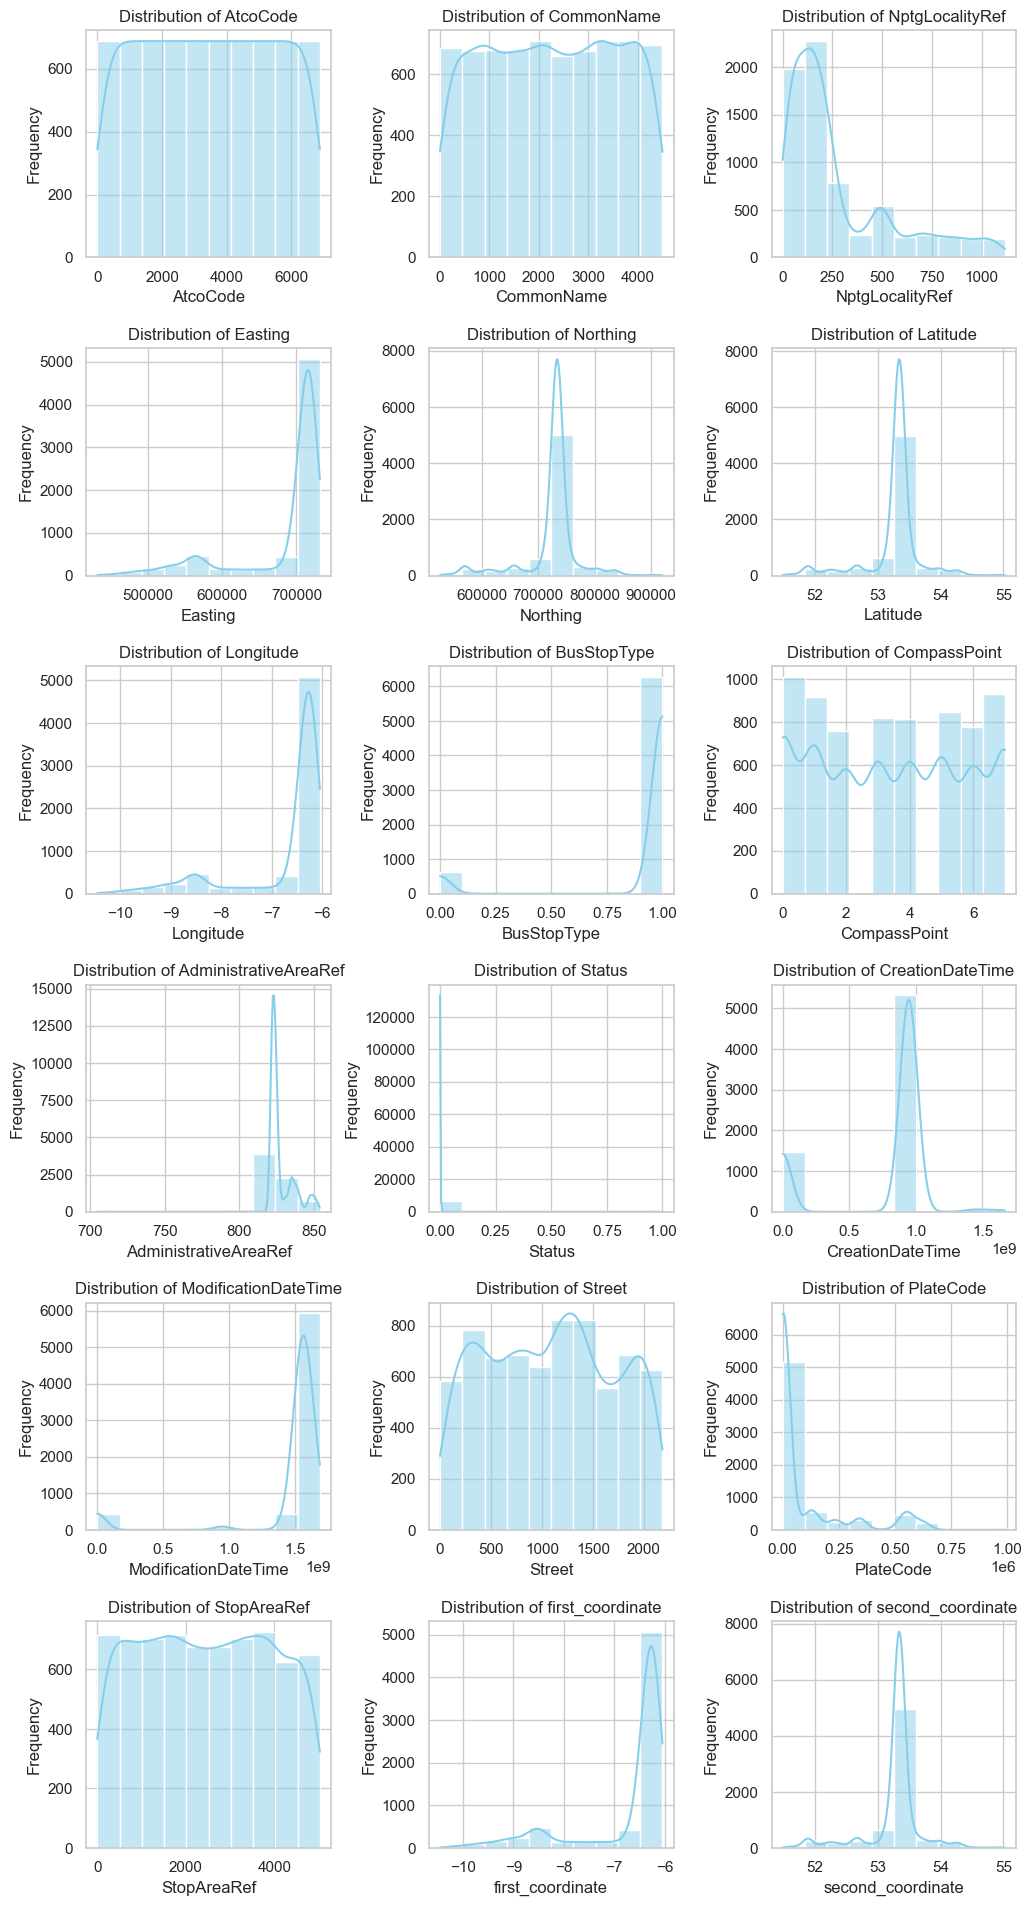

In [33]:
plot_histograms(df_ireland,df_ireland.columns)

### boxplots

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(dataset, column_names):
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")

    # Determine the subplot layout based on the number of features
    num_features = len(column_names)
    rows = int(num_features / 2) + (num_features % 2)  # Calculate the number of rows needed
    cols = 3  # Fixed 3 columns

    # Create a matrix of box plots
    plt.figure(figsize=(12, 4 * rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, column in enumerate(column_names):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x=dataset[column], color='skyblue')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

    plt.show()

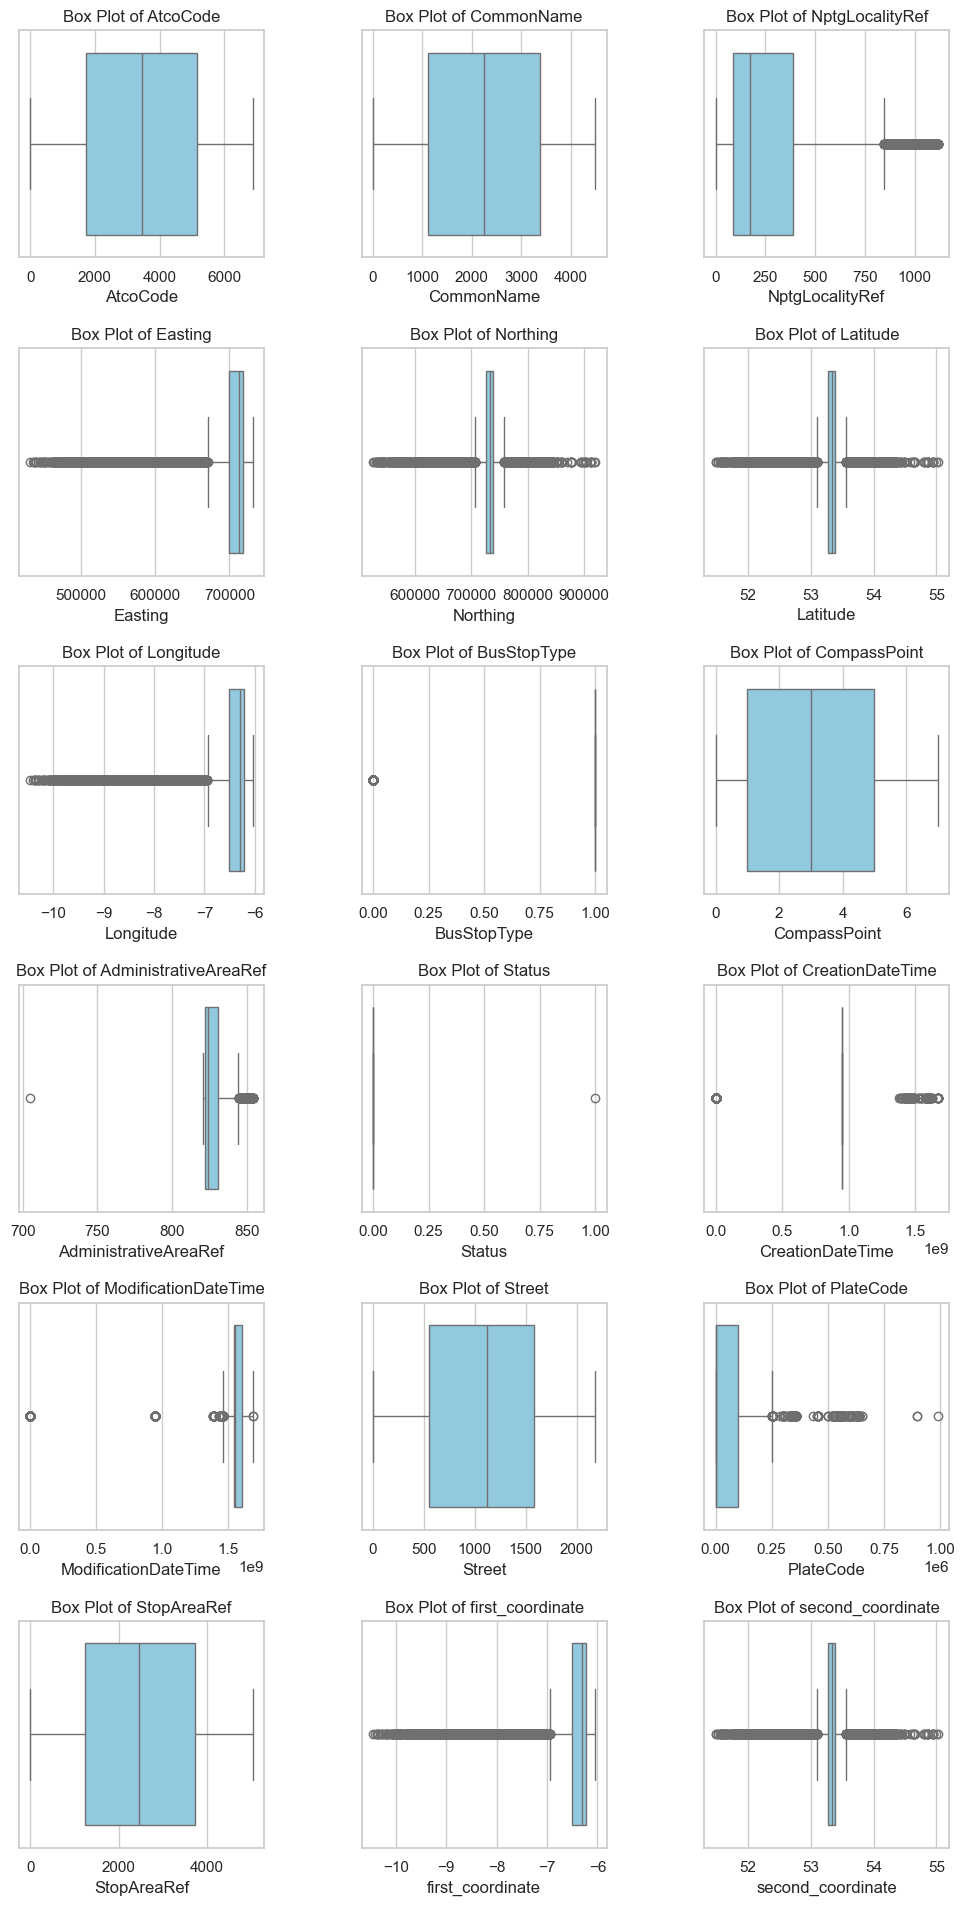

In [35]:
plot_boxplots(df_ireland,df_ireland.columns)

### statistics part 2:

In [36]:
from scipy.stats import chi2_contingency

def chi_squared_test(feature, target, dataframe, sample_fraction=None, random_state=None):
    # Optionally perform sampling
    if sample_fraction is not None:
        dataframe = dataframe.sample(frac=sample_fraction, random_state=random_state)

    # Create a contingency table
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])

    # Perform chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print("Chi2 Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:")
    print(expected)
    
    # Ho: There is no effect or no association.
    # H1: There is an effect or an association.
    
    if p_value < 0.05:
        print("\nRESULT: Reject the null hypothesis (significant association)")
    else:
        print("\nRESULT: Fail to reject the null hypothesis (no significant association)")

feature_column = 'AtcoCode'
target_column = 'BusStopType'

# Use the function with a 20% sample
chi_squared_test(feature_column, target_column, df_ireland, sample_fraction=0.2, random_state=42)


Chi2 Statistic: 1376.0000000000002
P-value: 0.4873248884929098
Degrees of Freedom: 1375
Expected Frequencies Table:
[[0.07921512 0.92078488]
 [0.07921512 0.92078488]
 [0.07921512 0.92078488]
 ...
 [0.07921512 0.92078488]
 [0.07921512 0.92078488]
 [0.07921512 0.92078488]]

RESULT: Fail to reject the null hypothesis (no significant association)


### statistics part 3 done in uk part, because of comparisons

parametric:
- t-tests (e.g., one-sample t-test, independent samples t-test, paired samples t-test)
- Analysis of Variance (ANOVA)

<br>


Non parametric:
- Two-Proportion Z-test
- Mann-Whitney U test
- Sign test

## Machine learning part

### using heatmap before logistic regression model

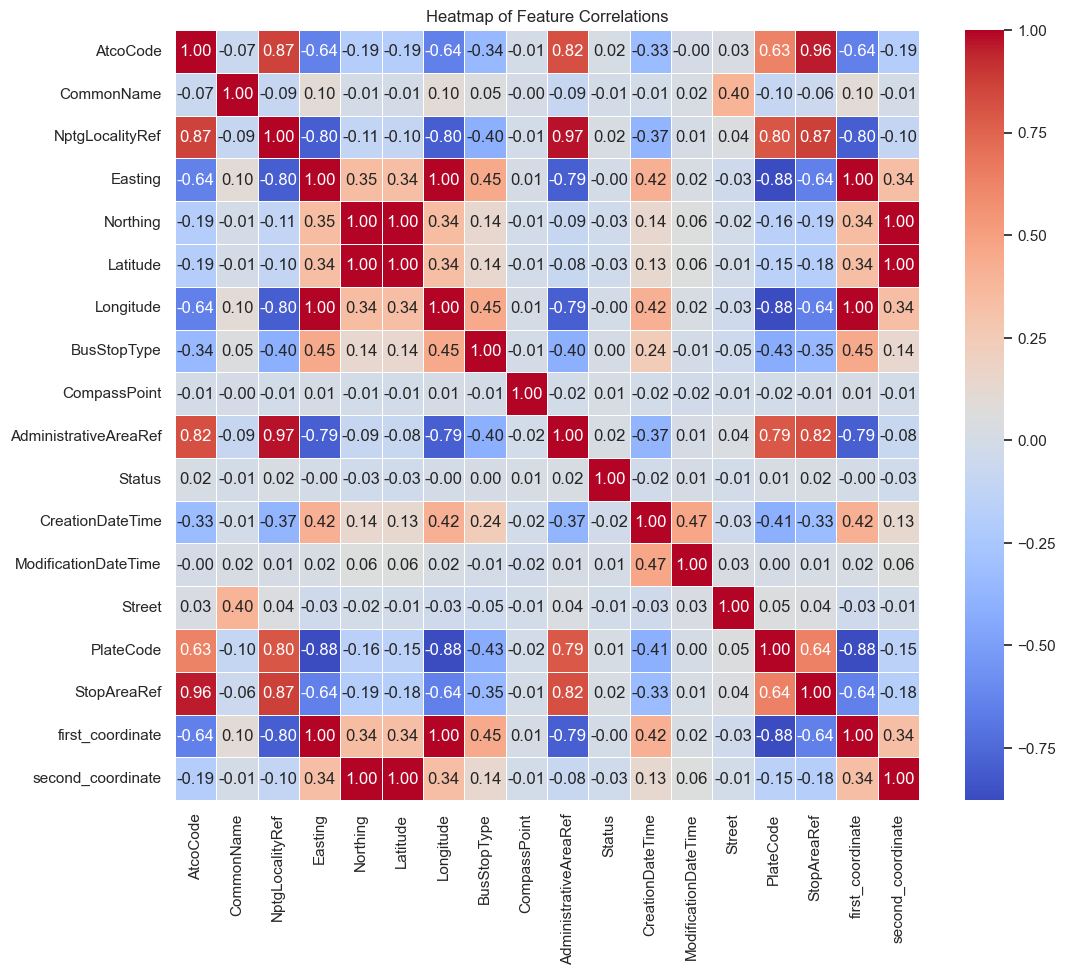

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_ireland.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

## applying logistic regression model using a class

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

class LogisticRegressionEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def evaluate_lr(self, model=None):
        if model is None:
            model = LogisticRegression()

        model.fit(self.X_train, self.y_train)

        y_pred = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred, average='micro')
        recall = recall_score(self.y_test, y_pred, average='micro')
        f1 = f1_score(self.y_test, y_pred, average='micro')

        class_report = classification_report(self.y_test, y_pred)

        # Print results
        print(f"Accuracy: {accuracy:.2f}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print(f"\nPrecision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("\nClassification Report:")
        print(class_report)

    def random_search(self, param_distributions, n_iter=10, scoring='accuracy', cv=5):
        random_search = RandomizedSearchCV(LogisticRegression(),
                                           param_distributions=param_distributions,
                                           n_iter=n_iter,
                                           scoring=scoring,
                                           cv=cv,
                                           random_state=42)
        random_search.fit(self.X_train, self.y_train)

        # print results
        print("Random Search Best Parameters:")
        print(random_search.best_params_)
        print("\n evaluate with better estimators: ")
        self.evaluate_lr(random_search.best_estimator_)

    def grid_search(self, param_grid, scoring='accuracy', cv=5):
        # Performing GridSearchCV
        grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                                   scoring=scoring, cv=cv)
        grid_search.fit(self.X_train, self.y_train)

        # print results
        print("Grid Search Best Parameters:")
        print(grid_search.best_params_)
        print("\n evaluate with better estimators: ")
        self.evaluate_lr(grid_search.best_estimator_)

logistic_evaluator = LogisticRegressionEvaluator(X_train, X_test, y_train, y_test)

logistic_evaluator.evaluate_lr()

Accuracy: 0.90

Confusion Matrix:
[[  18  103]
 [  32 1223]]

Precision: 0.90
Recall: 0.90
F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.15      0.21       121
           1       0.92      0.97      0.95      1255

    accuracy                           0.90      1376
   macro avg       0.64      0.56      0.58      1376
weighted avg       0.87      0.90      0.88      1376



In [39]:
#pip install dash pandas plotly scikit-learn

#### looking for hyperparameters with RandomizedSearchCV

In [40]:
# Perform RandomizedSearchCV
param_distributions_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000],
    'random_state': [20,40,62],
    'solver': ['liblinear', 'saga'],
    'fit_intercept': [True, False], 
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3, 1e-2],
    'warm_start': [False, True], 
    'l1_ratio': [None, 0.1, 0.5, 0.9],

}
logistic_evaluator.random_search(param_distributions_lr, n_iter=10)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarni

Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'saga', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': 0.9, 'fit_intercept': True, 'class_weight': None, 'C': 0.001}

 evaluate with better estimators: 


/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Accuracy: 0.91

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Precision: 0.91
Recall: 0.91
F1 Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [41]:
#line muted because it took a long time to execute.
#logistic_evaluator.grid_search(param_distributions_lr)

### Apply dimensionality reduction methods using PCA

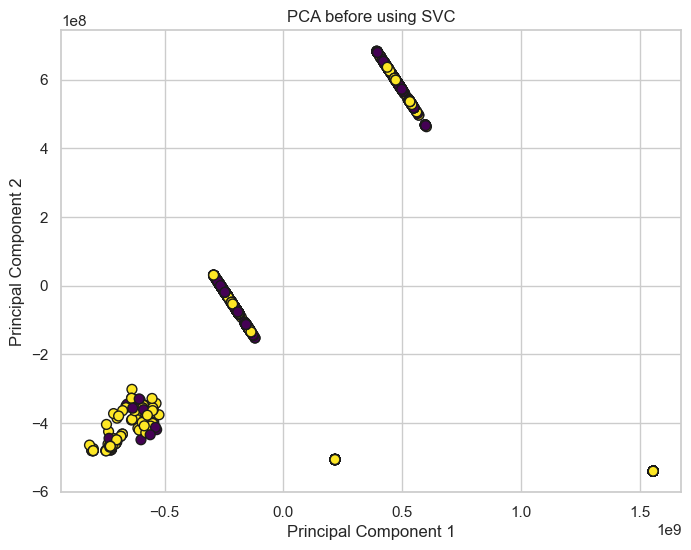

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA before using SVC')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### split data

In [43]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_svc.shape, X_test_svc.shape, y_train_svc.shape, y_test_svc.shape

((5503, 2), (1376, 2), (5503,), (1376,))

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC


class SVMClassifierWithCV:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = None

    def train_model(self, kernel='rbf', C=1.0, gamma='scale'):
        self.model = SVC(kernel=kernel, C=C, gamma=gamma)
        self.model.fit(self.X_train, self.y_train)

    def cross_validate(self, cv=5):
        if self.model is not None:
            cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=cv)
            mean_cv_score = np.mean(cv_scores)
            return mean_cv_score
        else:
            raise ValueError("Model has not been trained. Call train_model() first.")
            
    def plot_confusion_matrix(self):
        if self.model is not None:
            y_pred = self.model.predict(self.X_test)
            cm = confusion_matrix(self.y_test, y_pred)
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
            plt.title("Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()
        else:
            raise ValueError("Model has not been trained. Call train_model() first.")


Mean Cross-Validation Score: 0.9080502022954338


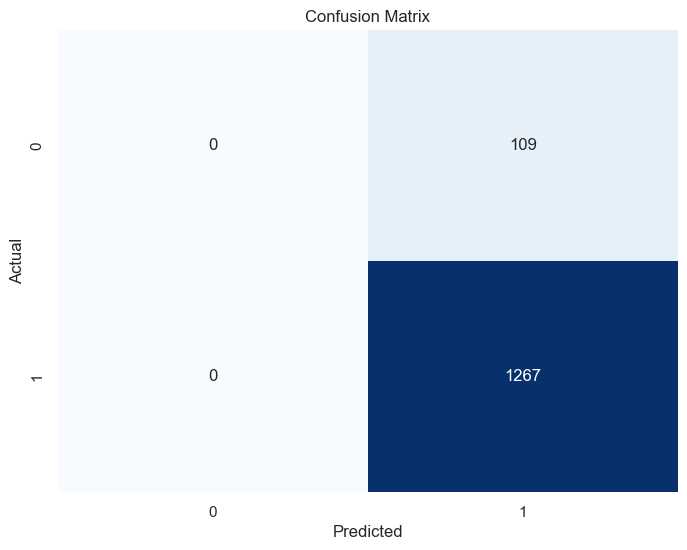

In [45]:
# Assuming you have X_train, X_test, y_train, and y_test already defined
svm_classifier = SVMClassifierWithCV(X_train_svc, X_test_svc, y_train_svc, y_test_svc)
svm_classifier.train_model()
cv_score = svm_classifier.cross_validate()
print(f"Mean Cross-Validation Score: {cv_score}")

svm_classifier.plot_confusion_matrix()

### Applying naives classifier creating a class with specific methods

In [46]:
from sklearn.dummy import DummyClassifier

class DummyClassifierEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test, strategy='stratified'):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.strategy = strategy

    def evaluate(self, model=None, params=None):
        if model is None:
            model = DummyClassifier(strategy=self.strategy)

        model.fit(self.X_train, self.y_train)

        y_pred = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred, average='micro')
        precision = precision_score(self.y_test, y_pred, average='micro')
        f1 = f1_score(self.y_test, y_pred, average='micro')

        conf_matrix = confusion_matrix(self.y_test, y_pred)

        class_report = classification_report(self.y_test, y_pred)

        print(f"Accuracy: {accuracy:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print("\nClassification Report:")
        print(class_report)

    def random_search(self, param_distributions, n_iter=10, scoring='accuracy', cv=5):
        random_search = RandomizedSearchCV(DummyClassifier(), 
                                           param_distributions=param_distributions,
                                           n_iter=n_iter, scoring=scoring, 
                                           cv=cv, random_state=42)
        random_search.fit(self.X_train, self.y_train)

        print("Random Search Best Parameters:")
        print(random_search.best_params_)
        print('\n')
        self.evaluate(random_search.best_estimator_)

    def grid_search(self, param_grid, scoring='accuracy', cv=5):
        grid_search = GridSearchCV(DummyClassifier(), param_grid=param_grid,
                                   scoring=scoring, cv=cv)
        grid_search.fit(self.X_train, self.y_train)

        print("Grid Search Best Parameters:")
        print(grid_search.best_params_)
        print('\n')
        self.evaluate(grid_search.best_estimator_)

evaluator_nc_irl = DummyClassifierEvaluator(X_train, X_test, y_train, y_test, strategy='stratified')

evaluator_nc_irl.evaluate()

Accuracy: 0.84
Recall: 0.84
Precision: 0.84
F1 Score: 0.84

Confusion Matrix:
[[  10  111]
 [ 104 1151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.09       121
           1       0.91      0.92      0.91      1255

    accuracy                           0.84      1376
   macro avg       0.50      0.50      0.50      1376
weighted avg       0.84      0.84      0.84      1376



#### hyperparameters with RandomizedSearchCV in naives

In [47]:
param_distributions_nc = {
    'strategy': ['stratified', 'most_frequent', 'uniform', 'constant'],
}
evaluator_nc_irl.random_search(param_distributions_nc, n_iter=10)


Random Search Best Parameters:
{'strategy': 'most_frequent'}


Accuracy: 0.91
Recall: 0.91
Precision: 0.91
F1 Score: 0.91

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_

#### hyperparameters with GridSearchCV in naives

In [48]:
evaluator_nc_irl.grid_search(param_distributions_nc)

Grid Search Best Parameters:
{'strategy': 'most_frequent'}


Accuracy: 0.91
Recall: 0.91
Precision: 0.91
F1 Score: 0.91

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-p

### Dashboard to choose models results

In [49]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Data results
accuracy_logistic_regression_ireland = 0.90
conf_matrix_logistic_regression = [[18,103],[32,1223]]

accuracy_naive_classifier_ireland = 0.84
conf_matrix_naive_classifier_ireland = [[10,111], [104,1151]]

# Available models
available_models = ['Logistic Regression', 'Naive Classifier']

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Machine Learning Analysis Dashboard"),
    
    html.Div([
        html.H2("Select Model:"),
        dcc.Dropdown(
            id='model-dropdown',
            options=[{'label': model, 'value': model} for model in available_models],
            value='Logistic Regression'
        ),
    ]),

    html.Div([
        html.H2("Evaluation Metrics:"),
        html.Div([
            html.P(id='accuracy-output'),
            html.P("Confusion Matrix:"),
            dcc.Graph(id='confusion-matrix'),
        ]),
    ]),
])

# Callback to update metrics based on selected model
@app.callback(
    [Output('accuracy-output', 'children'),
     Output('confusion-matrix', 'figure')],
    [Input('model-dropdown', 'value')]
)
def update_metrics(selected_model):
    if selected_model == 'Logistic Regression':
        accuracy = accuracy_logistic_regression_ireland
        conf_matrix = conf_matrix_logistic_regression
    elif selected_model == 'Naive Classifier':
        accuracy = accuracy_naive_classifier_ireland
        conf_matrix = conf_matrix_naive_classifier_ireland
    else:
        accuracy = 0.0
        conf_matrix = [[0, 0], [0, 0]]

    accuracy_text = f"Accuracy: {accuracy:.2f}"
    confusion_matrix_fig = px.imshow(conf_matrix, labels=dict(x="Predicted", y="Actual"))

    return accuracy_text, confusion_matrix_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# <h1>Data pre-processing of british dataset 🇬🇧</h1>

In [50]:
#LICENSE OF UK API :
#https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

In [51]:
url = 'https://naptan.api.dft.gov.uk'
csv_format ='/v1/access-nodes?dataFormat=csv'

In [52]:
df_uk = pd.read_csv(url + csv_format)

/var/folders/13/lflfr2vd5yx56dpdvjrmqhbw0000gn/T/ipykernel_25278/1292567839.py:1: DtypeWarning:

Columns (1,2,6,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [53]:
df_uk.head()

,ATCOCode,NaptanCode,PlateCode,CleardownCode,CommonName,CommonNameLang,ShortCommonName,ShortCommonNameLang,Landmark,LandmarkLang,...,TimingStatus,DefaultWaitTime,Notes,NotesLang,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
0,0100BRP90310,bstgwpa,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2023-04-21T18:02:19,99.0,new,active
1,0100BRP90311,bstgwpm,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-09-13T10:41:38,73.0,new,active
2,010000056,bstpjgw,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2019-08-06T00:00:00,2019-08-06T11:09:11,120.0,new,active
3,0100BRP90317,bstjada,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:10:46,49.0,new,active
4,0100BRP90318,bstgwtd,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:11:05,86.0,new,active


In [54]:
df_uk.shape

(437106, 43)

In [55]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437106 entries, 0 to 437105
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ATCOCode                 437106 non-null  object 
 1   NaptanCode               409581 non-null  object 
 2   PlateCode                62953 non-null   object 
 3   CleardownCode            0 non-null       float64
 4   CommonName               437106 non-null  object 
 5   CommonNameLang           0 non-null       float64
 6   ShortCommonName          96372 non-null   object 
 7   ShortCommonNameLang      0 non-null       float64
 8   Landmark                 273438 non-null  object 
 9   LandmarkLang             0 non-null       float64
 10  Street                   423041 non-null  object 
 11  StreetLang               0 non-null       float64
 12  Crossing                 0 non-null       float64
 13  CrossingLang             0 non-null       float64
 14  Indi

In [56]:
#checking how many values are null per column
df_uk.isnull().sum()

ATCOCode                        0
NaptanCode                  27525
PlateCode                  374153
CleardownCode              437106
CommonName                      0
CommonNameLang             437106
ShortCommonName            340734
ShortCommonNameLang        437106
Landmark                   163668
LandmarkLang               437106
Street                      14065
StreetLang                 437106
Crossing                   437106
CrossingLang               437106
Indicator                   22428
IndicatorLang              437106
Bearing                     23165
NptgLocalityCode                0
LocalityName                    4
ParentLocalityName         244058
GrandParentLocalityName    437106
Town                       282334
TownLang                   421684
Suburb                     366247
SuburbLang                 425396
LocalityCentre               5255
GridType                    15849
Easting                         0
Northing                        0
Longitude     

In [57]:
#Drop columns when the whole column has null values
column_names_uk = df_uk.columns

for column in column_names_uk:
    if df_uk[column].isnull().sum() == df_uk.shape[0]:
        df_uk.drop([column],axis=1,inplace=True)
        

In [58]:
df_uk.shape

(437106, 31)

In [59]:
# fill columns with general language
df_uk['SuburbLang'] = df_uk['SuburbLang'].fillna('EN')
df_uk['TownLang'] = df_uk['TownLang'].fillna('EN')

#fill empty values from another column 
df_uk['ShortCommonName'] = df_uk['ShortCommonName'].fillna(df_uk['CommonName'])
df_uk['ParentLocalityName'] = df_uk['ParentLocalityName'].fillna(df_uk['LocalityName'])
df_uk['Landmark'] = df_uk['Landmark'].fillna(df_uk['CommonName'])

#filling null values  with median value,using value and inplace parameters
df_uk['RevisionNumber'].fillna(value=df_uk['RevisionNumber'].median(),inplace=True)

#filling column with mode value
df_uk['Modification'].fillna(value=df_uk['Modification'].mode()[0],inplace=True)
df_uk['TimingStatus'].fillna(value=df_uk['TimingStatus'].mode()[0],inplace=True)
df_uk['Bearing'].fillna(value=df_uk['Bearing'].mode()[0],inplace=True)
#df_uk['BusStopType'].fillna(value=df_uk['BusStopType'].mode()[0],inplace=True) 

In [60]:
df_uk.shape

(437106, 31)

In [61]:
# It is better to remove unsual values different,because the column is about identifiers.

df_uk = df_uk[(df_uk['PlateCode'] != '-') & 
                (df_uk['PlateCode'] != 'none') & 
                (df_uk['PlateCode'] != '.') & 
                (df_uk['PlateCode'] != '/')]

# The column PlateCode has many repeated values.


In [62]:
# The column PlateCode has many repeated values.
value_counts_uk = df_uk['PlateCode'].value_counts()
print('print values and occurrences: ',value_counts_uk)

#The next line will show which values has repeated number
repeated_values = value_counts_uk[value_counts_uk > 1]
print('\n')#to make space between prints
print('print list of values with occurence more than 1: ',repeated_values.unique())

print values and occurrences:  PlateCode
2          58
3          54
10         29
9          26
6          25
           ..
BA1210      1
BA1211      1
BA1212      1
BA1213      1
35474.0     1
Name: count, Length: 62202, dtype: int64


print list of values with occurence more than 1:  [58 54 29 26 25 24 23 22 21 20 19 18 16 15 14 13 12 10  9  8  7  6  5  4
  3  2]


In [63]:
# Create a new DataFrame with only rows where the specified column has unique values
df_uk = df_uk[df_uk['PlateCode'].isin(value_counts_uk[value_counts_uk == 1].index)]

In [64]:
# It confirm that there are no repeated values
df_uk['PlateCode'].value_counts()

PlateCode
adj        1
22114      1
22085      1
22086      1
22087      1
          ..
BA1104     1
BA1105     1
BA1106     1
BA1107     1
35474.0    1
Name: count, Length: 62079, dtype: int64

In [65]:
#Drop columns:
df_uk.drop(['StopType'], axis=1,inplace=True)# all values are the same, not relevant
df_uk.drop(['TownLang'], axis=1,inplace=True)
df_uk.drop(['SuburbLang'], axis=1,inplace=True)
df_uk.drop(['GridType'], axis=1,inplace=True)

#drop rows that has null values in a column
df_uk.dropna(subset=['BusStopType'],inplace=True)
df_uk.dropna(subset=['PlateCode'],inplace=True)
df_uk.dropna(subset=['NaptanCode'],inplace=True)
df_uk.dropna(subset=['Indicator'],inplace=True)
df_uk.dropna(subset=['Street'],inplace=True)
df_uk.dropna(subset=['Town'],inplace=True)
df_uk.dropna(subset=['Suburb'],inplace=True)


<center>
  <h2>Acoording to values in Indicator column</h2>
</center>
<img src="./indicator_reference.png" alt="Girl in a jacket" width="500" height="600">

## there are incoherences:
### some values are in uppercase, other ones in lowercase
### 'northbound' similar to 'North Bound'
### 'W- Bound' similar to 'w-Bound'
### 'Se-Bound' similar to 'SE - Bound'

In [66]:
# Check unique values in column LocalityCentre:
df_uk['LocalityCentre'].unique()

array(['false', '0', '1', nan, 'true', False, True], dtype=object)

In [67]:
df_uk['LocalityCentre'] = df_uk['LocalityCentre'].str.lower().replace({'0': 'false', '1': 'true'})

In [68]:
df_uk.dropna(subset=['LocalityCentre'],inplace=True)

df_uk['LocalityCentre'].unique()

array(['false', 'true'], dtype=object)

In [69]:
# Finally there is no empty values.
print(df_uk.shape)
df_uk.isnull().sum()

(13683, 27)


ATCOCode                  0
NaptanCode                0
PlateCode                 0
CommonName                0
ShortCommonName           0
Landmark                  0
Street                    0
Indicator                 0
Bearing                   0
NptgLocalityCode          0
LocalityName              0
ParentLocalityName        0
Town                      0
Suburb                    0
LocalityCentre            0
Easting                   0
Northing                  0
Longitude                 0
Latitude                  0
BusStopType               0
TimingStatus              0
AdministrativeAreaCode    0
CreationDateTime          0
ModificationDateTime      0
RevisionNumber            0
Modification              0
Status                    0
dtype: int64

In [70]:
df_uk.shape

(13683, 27)

In [71]:
df_uk.head()

,ATCOCode,NaptanCode,PlateCode,CommonName,ShortCommonName,Landmark,Street,Indicator,Bearing,NptgLocalityCode,...,Longitude,Latitude,BusStopType,TimingStatus,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
151132,2290YHA00080,22900080,22900080,St Philip`s Church,St Philip`s Church,St Philip`s Church,Barham Road,opp,NE,N0078326,...,-0.265580,53.768493,MKD,OTH,26,2000-01-01T12:00:00,2019-11-05T12:00:00,0.0,revise,active
151205,2290YHA00163,22900163,22900163,Glaisdale Grove,Glisdale Grove,Glaisdale Grove,Bilsdale Grove,opp,S,N0078370,...,-0.286550,53.753567,MKD,OTH,26,2000-01-01T12:00:00,2019-11-05T12:00:00,0.0,revise,active
151282,2290YHA00244,22900244,22900244,Cannon Street,Reform Street,Cannon Street,Caroline Street,Eastbound,S,N0078636,...,-0.337450,53.750572,MKD,OTH,26,2000-01-01T12:00:00,2019-11-05T12:00:00,0.0,revise,active
151675,2290YHA00653,22900653,22900653,Leads Road,Rotterdam Park,Leads Road,Holwell Road,Westbound,S,N0078361,...,-0.328299,53.771722,MKD,OTH,26,2000-01-01T12:00:00,2019-11-05T12:00:00,0.0,revise,active
151789,2290YHA00783,22900783,22900783,ASDA Bilton,ASDA Bilton,ASDA Bilton,Main Road,opp,E,N0078327,...,-0.253352,53.779049,MKD,OTH,26,2000-01-01T12:00:00,2019-11-05T12:00:00,0.0,revise,active


## encoding before using machine models

In [72]:
df_uk.columns

Index(['ATCOCode', 'NaptanCode', 'PlateCode', 'CommonName', 'ShortCommonName',
       'Landmark', 'Street', 'Indicator', 'Bearing', 'NptgLocalityCode',
       'LocalityName', 'ParentLocalityName', 'Town', 'Suburb',
       'LocalityCentre', 'Easting', 'Northing', 'Longitude', 'Latitude',
       'BusStopType', 'TimingStatus', 'AdministrativeAreaCode',
       'CreationDateTime', 'ModificationDateTime', 'RevisionNumber',
       'Modification', 'Status'],
      dtype='object')

In [73]:
df_uk['ATCOCode'] = label_encoder.fit_transform(df_uk['ATCOCode'])
df_uk['NaptanCode'] = label_encoder.fit_transform(df_uk['NaptanCode'])
df_uk['PlateCode'] = label_encoder.fit_transform(df_uk['PlateCode'])
df_uk['CommonName'] = label_encoder.fit_transform(df_uk['CommonName'])
df_uk['ShortCommonName'] = label_encoder.fit_transform(df_uk['ShortCommonName'])
df_uk['Landmark'] = label_encoder.fit_transform(df_uk['Landmark'])
df_uk['Street'] = label_encoder.fit_transform(df_uk['Street'])
df_uk['Indicator'] = label_encoder.fit_transform(df_uk['Indicator'])
df_uk['Bearing'] = label_encoder.fit_transform(df_uk['Bearing'])
df_uk['NptgLocalityCode'] = label_encoder.fit_transform(df_uk['NptgLocalityCode'])
df_uk['LocalityName'] = label_encoder.fit_transform(df_uk['LocalityName'])
df_uk['ParentLocalityName'] = label_encoder.fit_transform(df_uk['ParentLocalityName'])
df_uk['Town'] = label_encoder.fit_transform(df_uk['Town'])
df_uk['Suburb'] = label_encoder.fit_transform(df_uk['Suburb'])
df_uk['LocalityCentre'] = label_encoder.fit_transform(df_uk['LocalityCentre'])
df_uk['BusStopType'] = label_encoder.fit_transform(df_uk['BusStopType'])
df_uk['TimingStatus'] = label_encoder.fit_transform(df_uk['TimingStatus'])
df_uk['Modification'] = label_encoder.fit_transform(df_uk['Modification'])
df_uk['Status'] = label_encoder.fit_transform(df_uk['Status'])


In [74]:
from datetime import datetime
# Function to convert timestamp to numbers
def convert_to_numbers(timestamp):
    try:
        # Try converting with microseconds
        dt_obj = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%f')
    except ValueError:
        # If the above format fails, try without microseconds
        dt_obj = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S')

    # Get timestamp in seconds and cast to integer
    timestamp_seconds = int((dt_obj - datetime(1970, 1, 1)).total_seconds())

    # Replace values less than 1970 with 0
    return max(0, timestamp_seconds)

# Apply the conversion function to the 'timestamp' column
df_uk['CreationDateTime'] = df_uk['CreationDateTime'].apply(convert_to_numbers)
df_uk['ModificationDateTime'] = df_uk['ModificationDateTime'].apply(convert_to_numbers)

In [75]:
df_uk.head()

,ATCOCode,NaptanCode,PlateCode,CommonName,ShortCommonName,Landmark,Street,Indicator,Bearing,NptgLocalityCode,...,Longitude,Latitude,BusStopType,TimingStatus,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
151132,0,0,4499,7820,7250,9873,203,1882,2,774,...,-0.265580,53.768493,2,0,26,946728000,1572955200,0.0,1,0
151205,1,1,4500,3382,3149,1624,308,1882,4,781,...,-0.286550,53.753567,2,0,26,946728000,1572955200,0.0,1,0
151282,2,2,4501,1416,6226,1100,525,142,4,785,...,-0.337450,53.750572,2,0,26,946728000,1572955200,0.0,1,0
151675,3,3,4502,4793,6441,2049,1354,1858,4,780,...,-0.328299,53.771722,2,0,26,946728000,1572955200,0.0,1,0
151789,4,4,4503,72,73,458,1620,1882,0,775,...,-0.253352,53.779049,2,0,26,946728000,1572955200,0.0,1,0


## Statistic part and plots


### part 1: descriptive statistic

In [76]:
#columns where i can appply descriptive statistics
df_uk.columns

Index(['ATCOCode', 'NaptanCode', 'PlateCode', 'CommonName', 'ShortCommonName',
       'Landmark', 'Street', 'Indicator', 'Bearing', 'NptgLocalityCode',
       'LocalityName', 'ParentLocalityName', 'Town', 'Suburb',
       'LocalityCentre', 'Easting', 'Northing', 'Longitude', 'Latitude',
       'BusStopType', 'TimingStatus', 'AdministrativeAreaCode',
       'CreationDateTime', 'ModificationDateTime', 'RevisionNumber',
       'Modification', 'Status'],
      dtype='object')

In [77]:
# Comparison in same column but different datasets

print(custom_descriptive_statistics(df_uk['BusStopType']))
print('\n')
print(custom_descriptive_statistics(df_ireland['BusStopType']))

{'Count': 13683, 'Mean': 1.947526127311262, 'Variance': 0.0970854962293354, 'Standard Deviation': 0.31158545574101404, 'Median': 2, 'Min': 0, 'Max': 2, 'Mode': [2]}


{'Count': 6879, 'Mean': 0.9105974705625818, 'Variance': 0.08142155341610753, 'Standard Deviation': 0.2853446221958766, 'Median': 1, 'Min': 0, 'Max': 1, 'Mode': [1]}


In [78]:
# Comparison in same column but different datasets

print(custom_descriptive_statistics(df_uk['Status']))
print('\n')
print(custom_descriptive_statistics(df_ireland['Status']))

{'Count': 13683, 'Mean': 0.07944164291456551, 'Variance': 0.07313601331323837, 'Standard Deviation': 0.2704367085165, 'Median': 0, 'Min': 0, 'Max': 1, 'Mode': [0]}


{'Count': 6879, 'Mean': 0.00014536996656490768, 'Variance': 0.00014536996656490465, 'Standard Deviation': 0.012056946817702426, 'Median': 0, 'Min': 0, 'Max': 1, 'Mode': [0]}


In [79]:
custom_descriptive_statistics(df_uk['Modification']) 

{'Count': 13683,
 'Mean': 0.9535189651392239,
 'Variance': 0.044323787591616245,
 'Standard Deviation': 0.21053215334389244,
 'Median': 1,
 'Min': 0,
 'Max': 1,
 'Mode': [1]}

In [80]:
#execute funtion to test
custom_descriptive_statistics({'test':'function to test'}) 

{'Error': 'Invalid data type. Please provide a list or pandas Series.'}

In [81]:
# execute the function to test
custom_descriptive_statistics(5) 

{'Error': 'Invalid data type. Please provide a list or pandas Series.'}

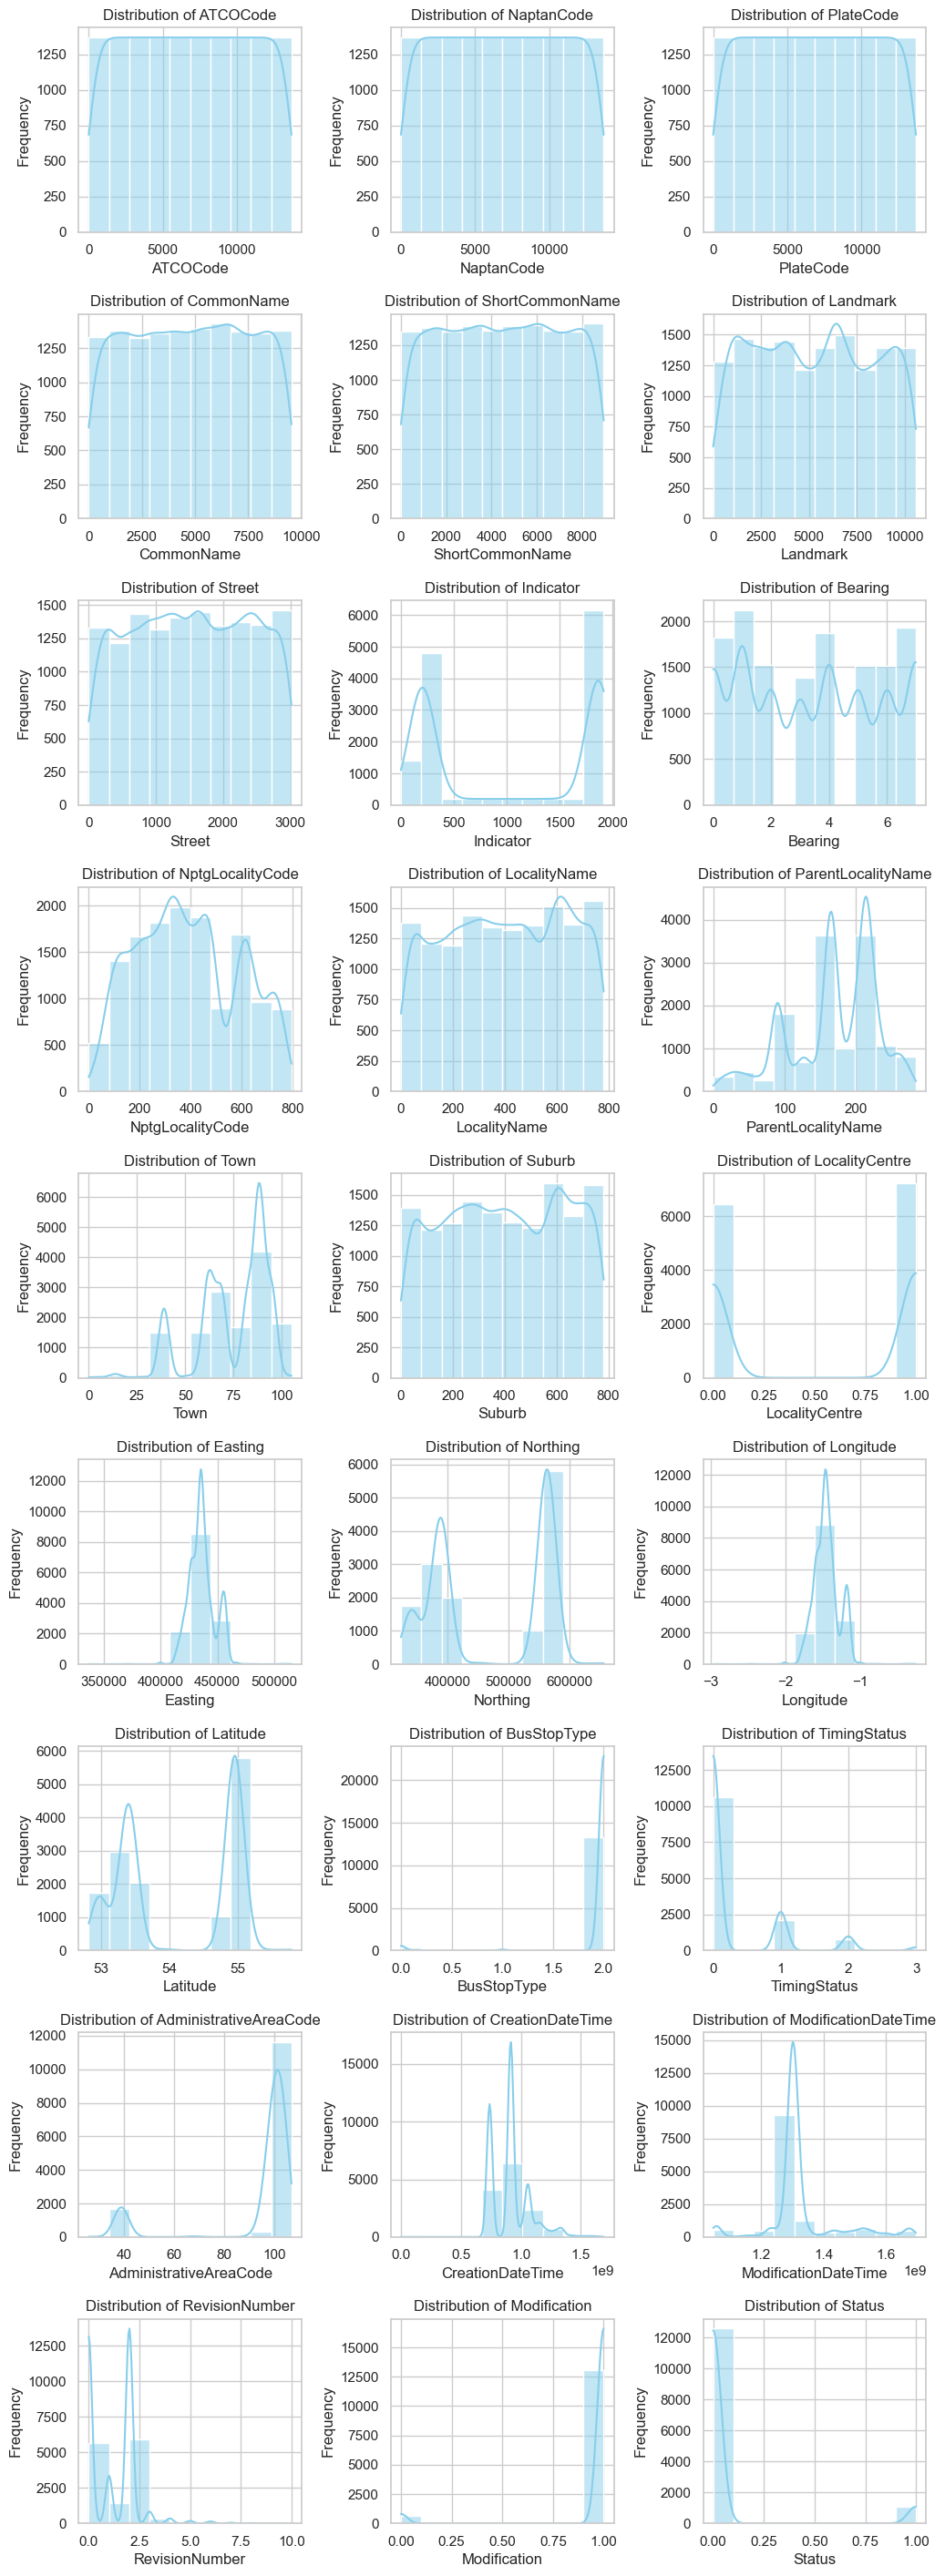

In [82]:
plot_histograms(df_uk,df_uk.columns)

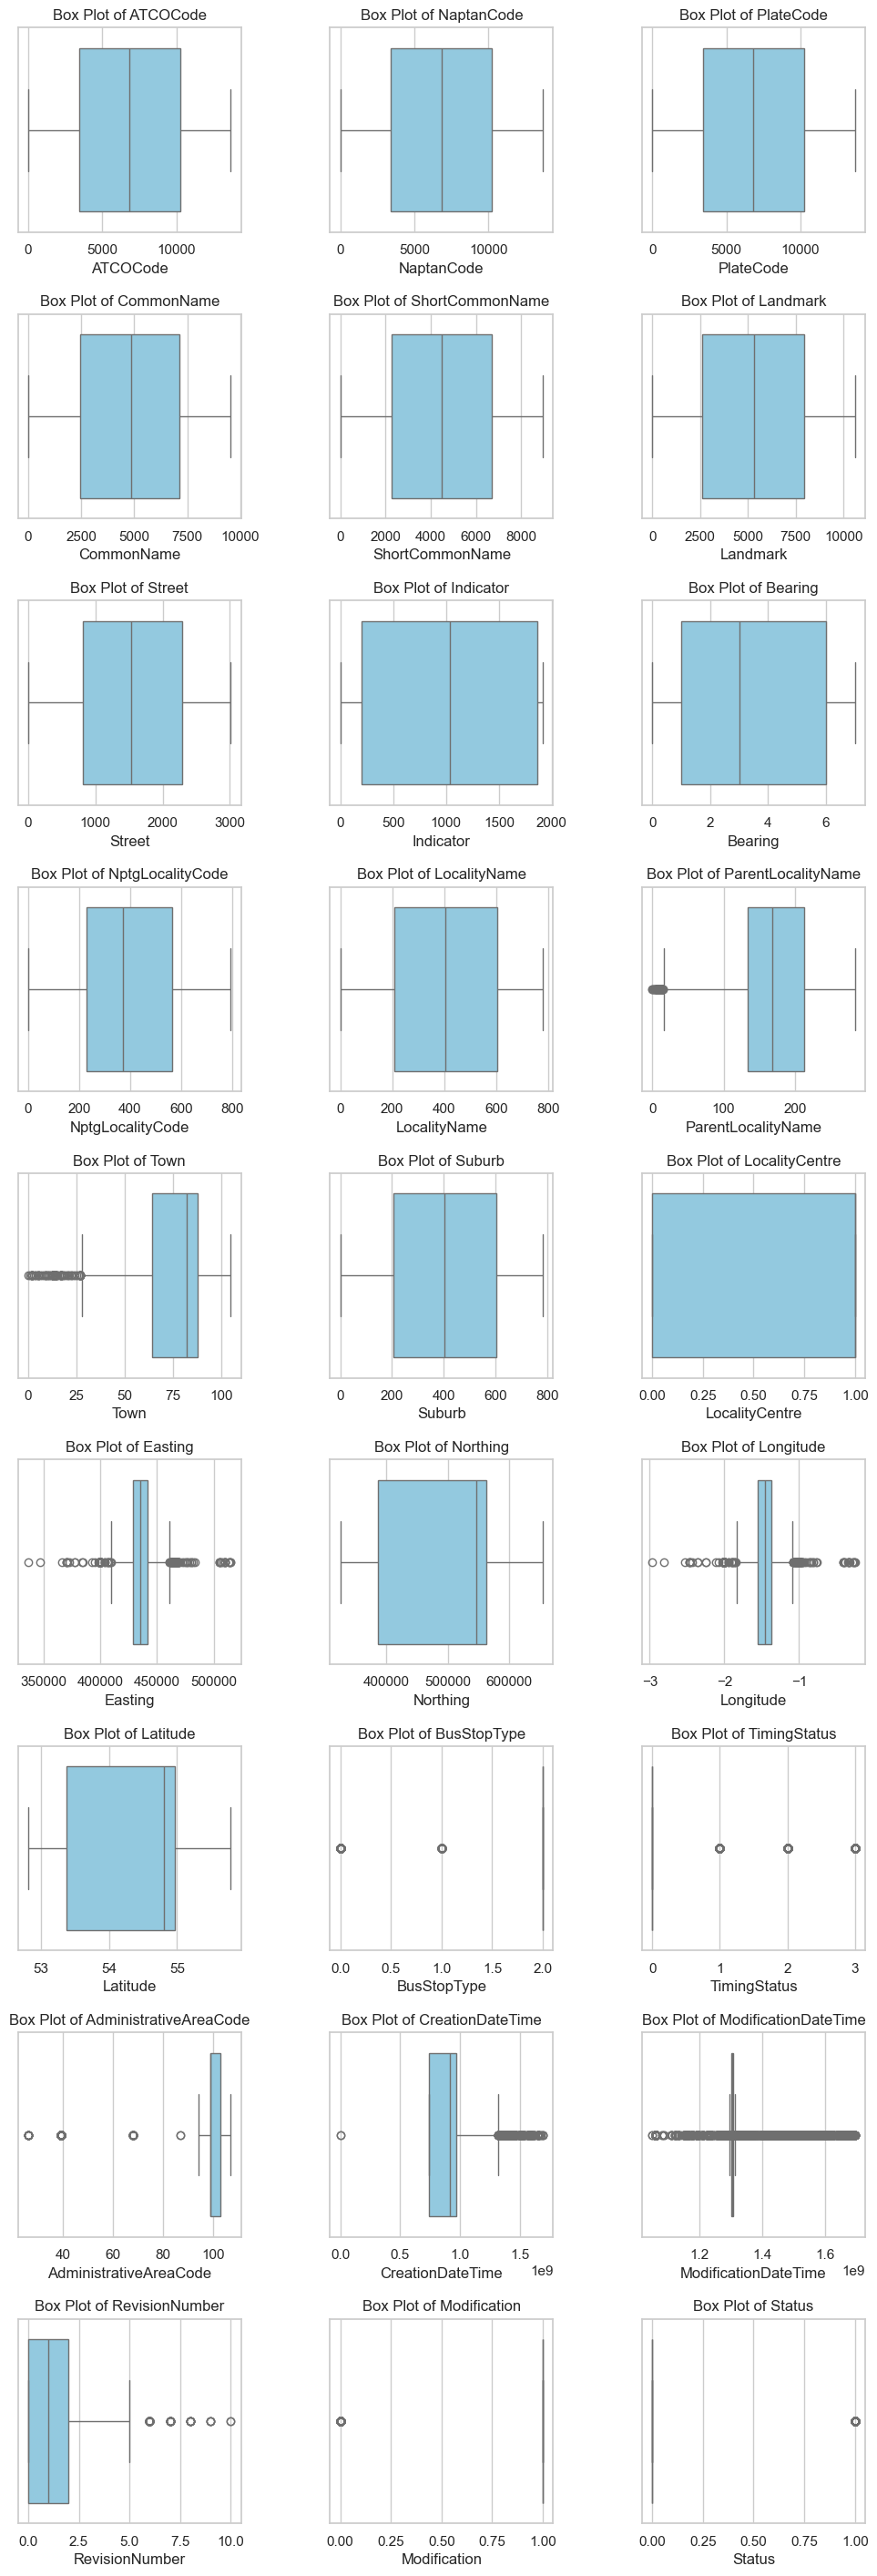

In [83]:
plot_boxplots(df_uk,df_uk.columns)

### part 2: sampling and test hypothesis

In [84]:
feature_column = "ATCOCode"
target_column = "LocalityCentre"

chi_squared_test(feature_column, target_column, df_uk, sample_fraction=0.2, random_state=42)


Chi2 Statistic: 2737.0
P-value: 0.49101299343482424
Degrees of Freedom: 2736
Expected Frequencies Table:
[[0.47058824 0.52941176]
 [0.47058824 0.52941176]
 [0.47058824 0.52941176]
 ...
 [0.47058824 0.52941176]
 [0.47058824 0.52941176]
 [0.47058824 0.52941176]]

RESULT: Fail to reject the null hypothesis (no significant association)


### statistics part 3:

### Parametric part:

### - ANOVA: 
#### H0 : there is no significant difference in the means of the groups being compared
#### H1: there is significant difference in the means of the groups being compared

In [85]:
bus_stop_type_uk = df_uk["BusStopType"]
bus_stop_type_ireland = df_ireland["BusStopType"]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(bus_stop_type_uk, bus_stop_type_ireland)

print(f"ANOVA F-statistic: {f_statistic}\nANOVA p-value: {p_value}")
print('\n')

# Check the p-value with alpha = 0.05
if p_value < 0.05:
    print("p_value < 0.05: There is a significant difference in the 'BusStopType' between the UK and Ireland datasets.")
else:
    print("p_value > 0.05: There is no significant difference in the 'BusStopType' between the UK and Ireland datasets.")


ANOVA F-statistic: 53589.743221066856
ANOVA p-value: 0.0


p_value < 0.05: There is a significant difference in the 'BusStopType' between the UK and Ireland datasets.


### - t-test:
- Ho: There is no significant difference in the average 'BusStopType' between the UK and Ireland
- H1: There is a significant difference.

In [86]:
from scipy.stats import ttest_ind

t_statistic, p_value_ttest = ttest_ind(bus_stop_type_uk, bus_stop_type_ireland)
print(f"t-test t-statistic: {t_statistic}\nt-test p-value: {p_value_ttest}")
print('\n')

# Check the p-value for the t-testwith alpha = 0.05
if p_value_ttest < 0.05:
    print("p_value_ttest < 0.05: There is a significant difference in the 'BusStopType' between the UK and Ireland datasets.")
else:
    print("p_value_ttest > 0.05: There is no significant difference in the 'BusStopType' between the UK and Ireland datasets.")


t-test t-statistic: 231.49458572732723
t-test p-value: 0.0


p_value_ttest < 0.05: There is a significant difference in the 'BusStopType' between the UK and Ireland datasets.


### Non parametric:

### Mann-Whitney U test :

- Ho: There is no difference in the distribution of active and inactive bus stops between NaPTAN Ireland and the UK.
- H1: There is a difference in the distribution of active and inactive bus stops.

In [87]:
import scipy.stats as stats

# Example data (replace with your actual data)
status_uk = df_uk["Status"]
status_ireland = df_ireland['Status']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(status_ireland, status_uk, alternative='two-sided')


print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# make decision with alpha = 0.05
if p_value <= 0.05:
    print('\nDecision: Reject the null hypothesis. There is a significant difference in bus stop status between NaPTAN Ireland and the UK.')
else:
    print('\nDecision:Fail to reject the null hypothesis. There is no significant difference in bus stop status.')


Mann-Whitney U Statistic: 43330783.5
P-value: 6.372969342714281e-127

Decision: Reject the null hypothesis. There is a significant difference in bus stop status between NaPTAN Ireland and the UK.


### Two-Proportion Z-test:

- H0: There is no difference between the proportions of active bus stops in NaPTAN Ireland and the UK.

- H1: there is a significant difference between the proportions.

In [88]:
import statsmodels.api as sm

active_uk = df_uk[df_uk['Status'] == 0].shape[0]
inactive_uk = df_uk[df_uk['Status'] == 1].shape[0]
total_uk = len(df_uk)

active_ireland = df_ireland[df_ireland['Status'] == 0].shape[0]
inactive_ireland = df_ireland[df_ireland['Status'] == 1].shape[0]
total_ireland = len(df_ireland)

# Perform Two-Proportion Z-test
z_stat, p_value = sm.stats.proportions_ztest([active_ireland, active_uk], [total_ireland, total_uk], alternative='two-sided')

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# make decision with alpha = 0.05
alpha = 0.05
if p_value <= alpha:
    print('\nDecision: Reject the null hypothesis. There is a significant difference in the proportion of active bus stops between NaPTAN Ireland and the UK.')
else:
    print('\nDecision: Fail to reject the null hypothesis. There is no significant difference in the proportion of active bus stops.')


Z-statistic: 23.966065413514904
P-value: 6.2839411110485884e-127

Decision: Reject the null hypothesis. There is a significant difference in the proportion of active bus stops between NaPTAN Ireland and the UK.


### Sign Test:

- Ho: There is no systematic difference in bus stop status between NaPTAN Ireland and the UK.
- H1: There is a significant systematic difference in bus stop status 

In [89]:
from scipy.stats import binom_test

bus_status_uk = df_uk["Status"]
bus_status_ireland = df_ireland['Status']

# Calculate the differences between paired observations
differences = bus_status_uk - bus_status_ireland

# Count the number of positive and negative differences
positive_diff = sum(differences > 0)
negative_diff = sum(differences < 0)

# Perform a binomial test on the count of positive differences
p_value = binom_test(positive_diff, n=len(differences), alternative='two-sided')

print(f'Number of positive differences: {positive_diff}')
print(f'Number of negative differences: {negative_diff}')
print(f'P-value: {p_value}')

# make decision with alpha = 0.05
if p_value <= 0.05:
    print('\nDecision: Reject the null hypothesis. There is a significant difference in bus stop status between NaPTAN Ireland and the UK.')
else:
    print('\nDecision: Fail to reject the null hypothesis. There is no significant difference in bus stop status.')


Number of positive differences: 0
Number of negative differences: 0
P-value: 5e-324

Decision: Reject the null hypothesis. There is a significant difference in bus stop status between NaPTAN Ireland and the UK.


/var/folders/13/lflfr2vd5yx56dpdvjrmqhbw0000gn/T/ipykernel_25278/177565304.py:14: DeprecationWarning:

'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.



## Split dataset into train and test data

In [90]:
X_uk = df_uk.drop(['LocalityCentre'], axis=1)
y_uk = df_uk['LocalityCentre']

# Split the data into training and testing sets
X_train_uk, X_test_uk, y_train_uk, y_test_uk = train_test_split(X_uk, y_uk, test_size=0.2, random_state=42)
X_train_uk.shape,X_test_uk.shape, y_train_uk.shape, y_test_uk.shape

((10946, 26), (2737, 26), (10946,), (2737,))

### Apply decision naives classifier the class created with british dataset 

In [91]:
evaluator_nc_uk = DummyClassifierEvaluator(X_train_uk, X_test_uk, y_train_uk, y_test_uk, strategy='stratified')

evaluator_nc_uk.evaluate()

Accuracy: 0.50
Recall: 0.50
Precision: 0.50
F1 Score: 0.50

Confusion Matrix:
[[628 660]
 [698 751]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1288
           1       0.53      0.52      0.53      1449

    accuracy                           0.50      2737
   macro avg       0.50      0.50      0.50      2737
weighted avg       0.50      0.50      0.50      2737



In [92]:
param_distributions_nc = {
    'strategy': ['stratified', 'most_frequent', 'uniform', 'constant'],
    'random_state': [42, 100,200,300,400]
}
evaluator_nc_uk.random_search(param_distributions_nc, n_iter=10)



Random Search Best Parameters:
{'strategy': 'most_frequent', 'random_state': 400}


Accuracy: 0.53
Recall: 0.53
Precision: 0.53
F1 Score: 0.53

Confusion Matrix:
[[   0 1288]
 [   0 1449]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1288
           1       0.53      1.00      0.69      1449

    accuracy                           0.53      2737
   macro avg       0.26      0.50      0.35      2737
weighted avg       0.28      0.53      0.37      2737



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/sit

In [93]:
evaluator_nc_uk.grid_search(param_distributions_nc)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/si

Grid Search Best Parameters:
{'random_state': 42, 'strategy': 'most_frequent'}


Accuracy: 0.53
Recall: 0.53
Precision: 0.53
F1 Score: 0.53

Confusion Matrix:
[[   0 1288]
 [   0 1449]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1288
           1       0.53      1.00      0.69      1449

    accuracy                           0.53      2737
   macro avg       0.26      0.50      0.35      2737
weighted avg       0.28      0.53      0.37      2737



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## using heatmap before logistic regression

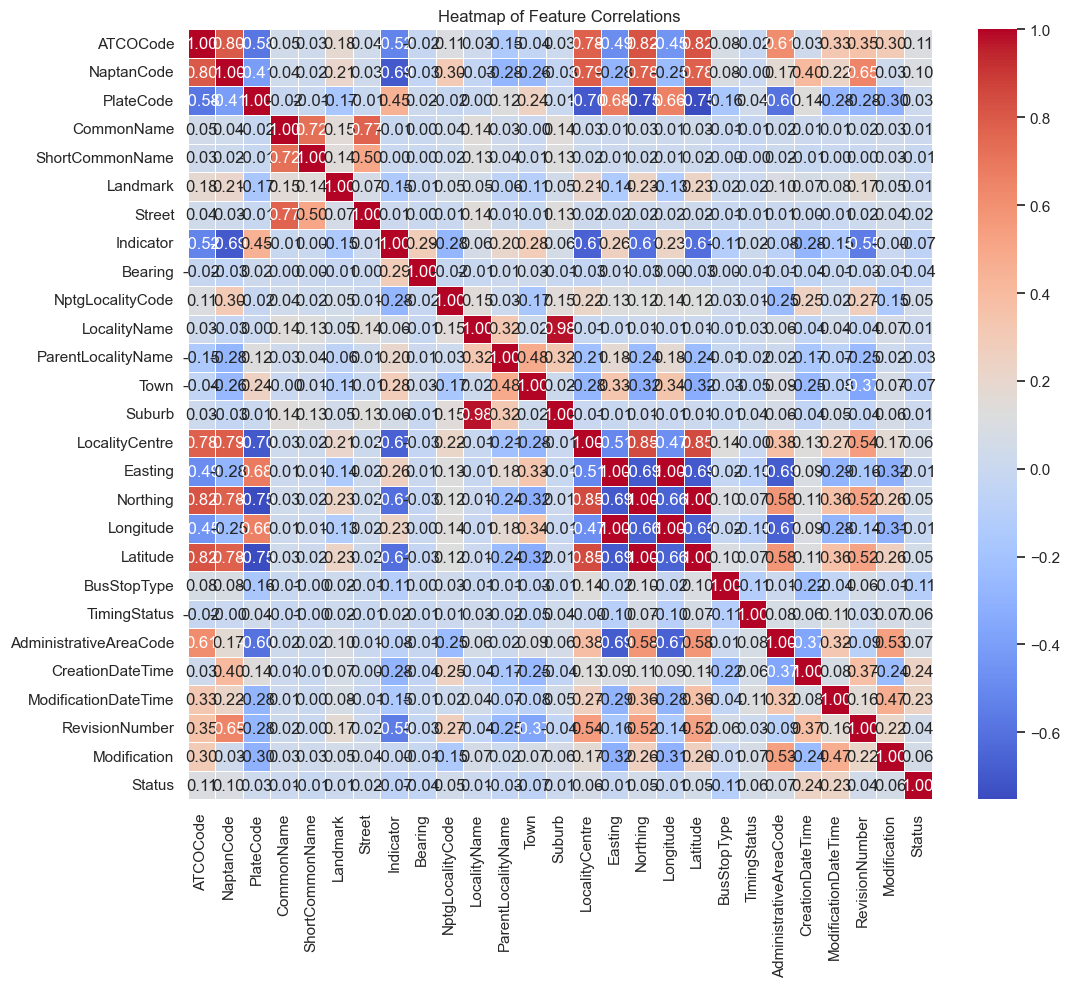

In [94]:
# Calculate the correlation matrix
correlation_matrix_uk = df_uk.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_uk, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show() 

## applying logistic regression class in uk dataset

In [95]:
logistic_evaluator_uk = LogisticRegressionEvaluator(X_train_uk, X_test_uk, y_train_uk, y_test_uk)

logistic_evaluator_uk.evaluate_lr() 

Accuracy: 0.94

Confusion Matrix:
[[1235   53]
 [ 115 1334]]

Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1288
           1       0.96      0.92      0.94      1449

    accuracy                           0.94      2737
   macro avg       0.94      0.94      0.94      2737
weighted avg       0.94      0.94      0.94      2737



In [96]:
# Perform RandomizedSearchCV
logistic_evaluator_uk.random_search(param_distributions_lr, n_iter=10)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iteratio

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=

Random Search Best Parameters:
{'warm_start': True, 'tol': 0.001, 'solver': 'liblinear', 'random_state': 62, 'penalty': 'l1', 'max_iter': 100, 'l1_ratio': 0.1, 'fit_intercept': True, 'class_weight': 'balanced', 'C': 10}

 evaluate with better estimators: 
Accuracy: 0.96

Confusion Matrix:
[[1284    4]
 [ 116 1333]]

Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1288
           1       1.00      0.92      0.96      1449

    accuracy                           0.96      2737
   macro avg       0.96      0.96      0.96      2737
weighted avg       0.96      0.96      0.96      2737



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [97]:
#line muted because it took a long time to execute
#logistic_evaluator_uk.grid_search(param_distributions_lr)

## Table to compare machine learning models (Lg vs. N)

<br>

<!-- Sample data for the table -->
<table style="border-collapse: collapse; width: 50%;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Metric</th>
        <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">log_reg_ir</th>
        <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">nai_bayes_ir</th>
        <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">log_reg_uk</th>
        <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">nai_bayes_uk</th>
    </tr>
    <tr style="background-color: #ffffff;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Accuracy</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.90</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.83</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.94</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.50</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Precision</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.90</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.83</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.94</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.50</td>
    </tr>
    <tr style="background-color: #ffffff;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Recall</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.90</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.83</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.94</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.50</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">F1 Score</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.90</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.83</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.94</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.50</td>
    </tr>
    <tr style="background-color: #ffffff;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Random_Acc </td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.91</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.91</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.96</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.52</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">F1 Grid_Acc</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;"></td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.91</td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;"></td>
        <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">0.52</td>
    </tr>
</table>


### dimensionality reduction using LDA(LinearDiscriminantAnalysis)

X_lda is::  [[-2.61215948]
 [-2.52513475]
 [-1.82900615]
 ...
 [ 2.40592501]
 [ 1.82816993]
 [-0.52116424]]


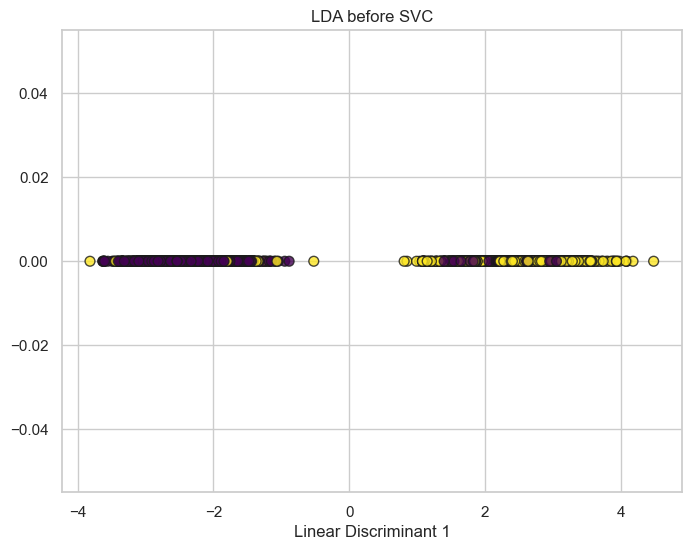

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X_uk.shape[1], len(set(y_uk)) - 1))
X_lda = lda.fit_transform(X_uk, y_uk)
print("X_lda is:: ",X_lda)

plt.figure(figsize=(8, 6))

if X_lda.shape[1] == 1:
    # If there is only one feature in X_lda, scatter against a constant value
    plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=y_uk, cmap='viridis', edgecolor='k', s=50, marker='o', alpha=0.8, label='Class')
    plt.xlabel('Linear Discriminant 1')
else:
    # Scatter plot with two features
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_uk, cmap='viridis', edgecolor='k', s=50, marker='o', alpha=0.8, label='Class')
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')

plt.title('LDA before SVC')
plt.show()

### split the data

In [99]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_uk, test_size=0.2, random_state=42)
X_train_lda.shape,X_test_lda.shape, y_train_lda.shape, y_test_lda.shape

((10946, 1), (2737, 1), (10946,), (2737,))

### apply SVM model and cross validation

Mean Cross-Validation Score: 0.9530421722560499


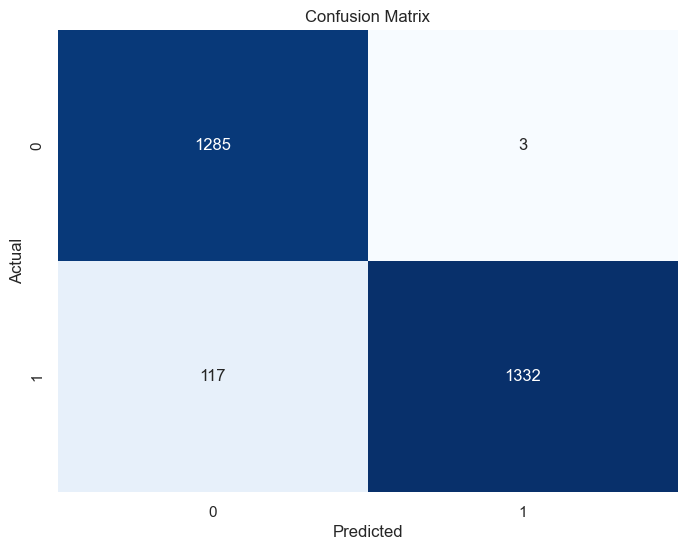

In [100]:
svm_classifier_lda = SVMClassifierWithCV(X_train_lda, X_test_lda, y_train_lda, y_test_lda)
svm_classifier_lda.train_model()
cv_score_lda = svm_classifier_lda.cross_validate()
print(f"Mean Cross-Validation Score: {cv_score_lda}")

svm_classifier_lda.plot_confusion_matrix()

# Sentiment analysis

In [101]:
import praw
import pandas as pd
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [102]:
load_dotenv()


True

In [103]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), # Right below 'personal use script'
    client_secret=getenv("APP_SECRET"), # secret
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", # app-name u/username
)

In [104]:
print(reddit.read_only)

True


In [105]:
subreddit = reddit.subreddit("ireland")
subreddit

Subreddit(display_name='ireland')

In [106]:
#print(subreddit.display_name)
# If the api is not connected, the following will give a 401 error
#print(subreddit.title)#Experiences using Public transport in Ireland
#print(subreddit.description)

### create dataframe about reddit comments

In [107]:
from textblob import TextBlob

# Function to fetch comments from a post URL
def get_comments_from_url(post_url):
    submission = reddit.submission(url=post_url)
    
    submission.comments.replace_more(limit=None)
    
    return [comment.body for comment in submission.comments.list()]

post_urls = [
    'https://www.reddit.com/r/ireland/comments/btiude/dublin_set_to_get_first_24hour_bus_service/',
    'https://www.reddit.com/r/irishtourism/comments/17y3yl5/experiences_using_public_transport_in_ireland/',
    'https://www.reddit.com/r/ireland/comments/pw746x/irelands_public_transport_is_a_joke_compared_to/',
    'https://www.reddit.com/r/ireland/comments/wfvins/we_dont_all_need_electric_cars_we_need_less_cars/',
]

comments_list = []
for url in post_urls:
    comments_list.extend(get_comments_from_url(url))

sentiments = [TextBlob(comment).sentiment.polarity for comment in comments_list]

# 0 if the sentiment is less than 0,
# 1 if the sentiment is equal to 0,
# 2 if the sentiment is greater than 0.
labels = [0 if sentiment < 0 else 1 if sentiment == 0 else 2 for sentiment in sentiments]

data = {'comment': comments_list, 'sentiment': sentiments, 'category': labels}
df_comment = pd.DataFrame(data)

#df.to_csv('dataframe_comments_created.csv')
print(df_comment)

                                                comment  sentiment  category
0     I keep preaching but a Night Luas on the weeke...   0.206667         2
1                                             [deleted]   0.000000         1
2     This is great but I’d love if they extended ho...   0.500000         2
3     Airport buses should be the first ones top get...   0.500000         2
4     Finally a 24hr service from the airport, it's ...   0.173333         2
...                                                 ...        ...       ...
1193  It's very difficult to have a conversation wit...   0.033810         2
1194  One-off housing is practically non-existent in...  -0.141667         0
1195  Please tell me how plopping a bungalow there p...   0.000000         1
1196  Urban planning and economics have allowed them...   0.005833         2
1197  And do you think the modern world is anyway si...   0.066667         2

[1198 rows x 3 columns]


## Data Pre Processing

In [108]:
df_comment.shape

(1198, 3)

In [109]:
df_comment.head()

,comment,sentiment,category
0,I keep preaching but a Night Luas on the weeke...,0.206667,2
1,[deleted],0.000000,1
2,This is great but I’d love if they extended ho...,0.500000,2
3,Airport buses should be the first ones top get...,0.500000,2
4,"Finally a 24hr service from the airport, it's ...",0.173333,2


In [110]:
#check if there are repeated values
df_comment['comment'].value_counts()

comment
[deleted]                                                                                                                                                                                                                                                                                                                                                                        61
Fewer*                                                                                                                                                                                                                                                                                                                                                                            4
*fewer cars                                                                                                                                                                                                                                             

In [111]:
# Drop rows with repeated values in the specified column
df_comment.drop_duplicates(subset='comment', keep=False, inplace=True)

In [112]:
df_comment['comment'].value_counts()

comment
I keep preaching but a Night Luas on the weekend would be amazing. Just have it run once per hour like 1:11 2:22 and 3:33 so people can get home easy and safe. Too often especially when it rains I am unable to get a cab for ages after a night out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1
Maybe it would be a good idea to kill yourself. No one wants your comment here anyway.                                                                                                                                              

In [113]:
print(df_comment)

                                                comment  sentiment  category
0     I keep preaching but a Night Luas on the weeke...   0.206667         2
2     This is great but I’d love if they extended ho...   0.500000         2
3     Airport buses should be the first ones top get...   0.500000         2
4     Finally a 24hr service from the airport, it's ...   0.173333         2
5     Why the fuck has this taken so long to be real...  -0.036061         0
...                                                 ...        ...       ...
1193  It's very difficult to have a conversation wit...   0.033810         2
1194  One-off housing is practically non-existent in...  -0.141667         0
1195  Please tell me how plopping a bungalow there p...   0.000000         1
1196  Urban planning and economics have allowed them...   0.005833         2
1197  And do you think the modern world is anyway si...   0.066667         2

[1125 rows x 3 columns]


In [114]:
# columns to use
X_comment = df_comment['comment']
y_comment = df_comment['category']


In [115]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernandoleniz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
stop_words = stopwords.words('english')

# list of punctuation
punct = string.punctuation

# initalize object 
stemmer = PorterStemmer()

print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [117]:
# import reg exp library
import re

cleaned_data=[]

# preprocessing before using the model 
for i in range(len(X_comment)):
    comment = re.sub('[^a-zA-Z]', ' ', X_comment.iloc[i])
    comment = comment.lower().split()
    comment = [stemmer.stem(word) for word in comment if (word not in stop_words) and (word not in punct)]
    comment = ' '.join(comment)
    cleaned_data.append(comment)

In [118]:
cleaned_data

['keep preach night lua weekend would amaz run per hour like peopl get home easi safe often especi rain unabl get cab age night',
 'great love extend hour sunday away whole sunday servic thing tri get work bu mad',
 'airport buse first one top get honestli edit goe though airport',
 'final hr servic airport absolut ridicul fli dublin pm good luck tri get around without forc pay fortun taxi',
 'fuck taken long realiz go gig midnight movi even drink late town weekday pain ars live alreadi easi way home everyon live weekend',
 'fuckin hell took till',
 'great news hope see cork great controversi take bu easi campaign probabl bit overkil id like see gener extens rout oper time seem moment let get night train least bu substitut night lua',
 'make x run later honestli mental end earli',
 'took midnight bu go anywher',
 'person would done bu sinc goe length citi start',
 'includ buse e c',
 'one cork honestli great bring complet home within short walk distanc save fortun taxi fare',
 'naa hou

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 20)

X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(1125, 224)

#### split the data

In [120]:
#split the data before using machien learning model
X_train_comment, X_test_comment, y_train_comment, y_test_comment = train_test_split(X_fin, y_comment, test_size = 0.2,random_state=42)
X_train_comment.shape, X_test_comment.shape, y_train_comment.shape, y_test_comment.shape

((900, 224), (225, 224), (900,), (225,))

#### apply machine learning model 

In [121]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate an object model by calling a method MultinomialNB()
model_comment = MultinomialNB()

model_comment.fit(X_train_comment,y_train_comment)

y_pred_comment = model_comment.predict(X_test_comment)
#y_pred_comment

# Evaluate the model
accuracy_comment = accuracy_score(y_test_comment, y_pred_comment)
print(f"Accuracy: {accuracy_comment}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_comment, y_pred_comment))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.28      0.33        46
           1       0.25      0.08      0.12        52
           2       0.57      0.79      0.66       127

    accuracy                           0.52       225
   macro avg       0.40      0.38      0.37       225
weighted avg       0.46      0.52      0.47       225



In [122]:
# Define the parameter grid
param_grid_mn = {'alpha': [0.01,0.1, 0.5, 1.0, 1.5, 2.0]}

# Create the Multinomial Naive Bayes classifier
clf_mn = MultinomialNB()

# Create GridSearchCV
grid_search_mn = GridSearchCV(clf_mn, param_grid_mn, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_mn.fit(X_fin, y_comment)

# Print the best parameters and their corresponding accuracy
print("Best Hyperparameters:", grid_search_mn.best_params_)
print("Best Accuracy:", grid_search_mn.best_score_)

Best Hyperparameters: {'alpha': 0.01}
Best Accuracy: 0.5537777777777777


### using logistic regression class

In [123]:
model_lg_comment = LogisticRegression(max_iter = 1000, random_state = 0)
model_lg_comment.fit(X_train_comment, y_train_comment)

LogisticRegression(max_iter=1000, random_state=0)

In [124]:
# new instnace of LogisticRegressionEvaluator 
logistic_evaluator_comment = LogisticRegressionEvaluator(X_train_comment, X_test_comment, y_train_comment, y_test_comment)

logistic_evaluator_comment.evaluate_lr()

Accuracy: 0.57

Confusion Matrix:
[[13 11 22]
 [ 3 24 25]
 [16 19 92]]

Precision: 0.57
Recall: 0.57
F1 Score: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.28      0.33        46
           1       0.44      0.46      0.45        52
           2       0.66      0.72      0.69       127

    accuracy                           0.57       225
   macro avg       0.50      0.49      0.49       225
weighted avg       0.56      0.57      0.56       225



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### using method to find best parameters

In [125]:
# Apply hyperparameters with RandomizedSearchCV
logistic_evaluator_comment.random_search(param_distributions_lr, n_iter=10)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning:

l1_ratio parameter is only used whe

Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'liblinear', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': None, 'fit_intercept': True, 'class_weight': 'balanced', 'C': 0.01}

 evaluate with better estimators: 
Accuracy: 0.60

Confusion Matrix:
[[  1   6  39]
 [  0  20  32]
 [  0  13 114]]

Precision: 0.60
Recall: 0.60
F1 Score: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        46
           1       0.51      0.38      0.44        52
           2       0.62      0.90      0.73       127

    accuracy                           0.60       225
   macro avg       0.71      0.43      0.40       225
weighted avg       0.67      0.60      0.52       225

